   ### Phase 1: Scraping _________________________________________________________

In [ ]:
!pip install selenium   

In [ ]:
!pip install selenium==4.9.1

In [111]:
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException, ElementClickInterceptedException
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

def get_jobs(keyword, num_jobs, verbose):    
    
    options = webdriver.ChromeOptions()
    options.add_argument('--disable-application-cache')
    
    driver = webdriver.Chrome(executable_path='C:/Users/HP/driver/chromedriver.exe',options=options)
    driver.set_window_size(1120, 1000)
    url = "https://www.glassdoor.com/Job/jobs.htm?suggestCount=0&suggestChosen=false&clickSource=searchBtn&typedKeyword="+keyword+"&sc.keyword="+keyword+"&locT=&locId=&jobType="
    driver.get(url)
    jobs = []
    
    for i in range(int(num_jobs/30)+1):
        
#         if len(jobs)%30==0 :
            try:  #Clicking on the "next page" button
                driver.find_element(By.XPATH,'//button[@class="button_Button__meEg5 button-base_Button__9SPjH" and @data-test="load-more"]').click()
                print("clicked !!")
            except NoSuchElementException:
                print("Scraping terminated before reaching target number of jobs. Needed {}, got {}.".format(num_jobs, len(jobs)))
                break
                
            time.sleep(3)  
            try:
                driver.find_element(By.XPATH,'//button[@class="CloseButton"]').click()
            except NoSuchElementException:
                pass
            except ElementClickInterceptedException:
                pass

    while len(jobs) < num_jobs:  #If true, should be still looking for new jobs.
        
        time.sleep(4)
        print("len(jobs): {}".format("" + str(len(jobs)))) 
        
        job_buttons = driver.find_elements(By.CLASS_NAME,'JobsList_jobListItem__JBBUV')   #Going through each job in this page  data-test="jobListing"           
        print("len(job_buttons): {}".format("" + str(len(job_buttons))))
        
        for job_button in job_buttons: # for Job Listing. These are the buttons we're going to click.    
            
            print("Progress: {}".format("" + str(len(jobs)) + "/" + str(num_jobs)))         
            if len(jobs) >= num_jobs:
                break

            time.sleep(2)
            job_button.click()  # print("job_button: {}".format("" + str(job_button)))
            time.sleep(1)        
            collected_successfully = False      
            while not collected_successfully: 
                
                time.sleep(1)      
                try:
                    driver.find_element(By.XPATH,'//button[@class="CloseButton"]').click()
                except NoSuchElementException:
                    pass
                except ElementClickInterceptedException:
                    pass
                
                try:                  
                    try:    # Locate the element containing the "alt" tag
                        job_details = driver.find_element(By.CLASS_NAME, "JobDetails_jobDetailsHeader__qKuvs")
                        employer_profile = job_details.find_element(By.CLASS_NAME, "EmployerProfile_profileContainer__d5rMb")
                        logo_img = employer_profile.find_element(By.TAG_NAME, "img")
                        alt_text = logo_img.get_attribute("alt")  # Extract the "alt" text
                        company_name= alt_text                    
                    except NoSuchElementException:
                        company_name = "UNKNOWN "  
                        
                    location = driver.find_element(By.XPATH,'//div[@class="JobDetails_location__MbnUM" and @data-test="location"]').text
                    job_title = driver.find_element(By.XPATH,'//h1[@class="JobDetails_jobTitle__Rw_gn"]').text
                    job_description = driver.find_element(By.XPATH,'//*[@id="app-navigation"]/div[3]/div[2]/div[2]/div[1]/section/div[1]/div[1]').text
                    collected_successfully = True
                except:
                    time.sleep(3)
                    
                try:
                    rating = driver.find_element(By.XPATH,'//*[@id="rating-headline"]').text
                except NoSuchElementException:
                    rating = -1 
                    
                try:   
                    salary_estimate = driver.find_element(By.CLASS_NAME, "SalaryEstimate_averageEstimate__xF_7h").text  # Find by class name                 
                except NoSuchElementException:
                    salary_estimate = -1 # You need to set a "not found value. It's important."
    
                #Printing for debugging
                if verbose:
                    print("Company Name: {}".format(company_name))
                    print("Rating: {}".format(rating))
                    print("Job Title: {}".format(job_title))
                    print("Location: {}".format(location))
                    print("Salary Estimate: {}".format(salary_estimate))                   
                    print("Job Description: {}".format(job_description[:800]))

                try:
                    
                    try:
                        size = driver.find_element(By.XPATH,'//*[@id="app-navigation"]/div[3]/div[2]/div[2]/div[1]/section/section[2]/div/div/div[1]/div').text
                    except NoSuchElementException:
                        size = -1
                    time.sleep(1)

                    try:
                        founded = driver.find_element(By.XPATH,'//*[@id="app-navigation"]/div[3]/div[2]/div[2]/div[1]/section/section[2]/div/div/div[2]/div').text
                    except NoSuchElementException:
                        founded = -1
                    time.sleep(1)

                    try:
                        type_of_ownership = driver.find_element(By.XPATH,'//*[@id="app-navigation"]/div[3]/div[2]/div[2]/div[1]/section/section[2]/div/div/div[3]/div').text
                    except NoSuchElementException:
                        type_of_ownership = -1

                    try:
                        industry = driver.find_element(By.XPATH,'//*[@id="app-navigation"]/div[3]/div[2]/div[2]/div[1]/section/section[2]/div/div/div[4]/div').text
                    except NoSuchElementException:
                        industry = -1

                    try:
                        sector = driver.find_element(By.XPATH,'//*[@id="app-navigation"]/div[3]/div[2]/div[2]/div[1]/section/section[2]/div/div/div[5]/div').text
                    except NoSuchElementException:
                        sector = -1

                    try:
                        revenue = driver.find_element(By.XPATH,'//*[@id="app-navigation"]/div[3]/div[2]/div[2]/div[1]/section/section[2]/div/div/div[6]/div').text
                    except NoSuchElementException:
                        revenue = -1

                except NoSuchElementException:  #Rarely, some job postings do not have the "Company" tab.
                    size = -1
                    founded = -1
                    type_of_ownership = -1
                    industry = -1
                    sector = -1
                    revenue = -1

                if verbose:
                    print("Size: {}".format(size))
                    print("Founded: {}".format(founded))
                    print("Type of Ownership: {}".format(type_of_ownership))
                    print("Industry: {}".format(industry))
                    print("Sector: {}".format(sector))
                    print("Revenue: {}".format(revenue))
                    print("@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@")

                jobs.append({
                "Company Name" : company_name,
                "Job Title" : job_title,
                "Salary ($) /yr" : salary_estimate,
                "Job Description" : job_description,
                "Rating" : rating,
                "Location" : location,
                "Size" : size,
                "Founded" : founded,
                "Type of ownership" : type_of_ownership,
                "Industry" : industry,
                "Sector" : sector,
                "Revenue" : revenue
                })            
                
#                 print("len(jobs): {}".format("" + str(len(jobs))))
#                 job_buttons = driver.find_elements(By.CLASS_NAME,'JobsList_jobListItem__JBBUV')
#                 print("len(job_buttons): {}".format("" + str(len(job_buttons))))
    return pd.DataFrame(jobs)

In [112]:
# Example usage
df = get_jobs('data scientist', 500, False)
df.to_csv('Uncleaned_DT_jobs_500.csv', index=False, sep=',')
df

C:\Users\HP\AppData\Local\Temp\ipykernel_2696\3744874985.py:14: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path='C:/Users/HP/driver/chromedriver.exe',options=options)


clicked !!
clicked !!
clicked !!
clicked !!
clicked !!
clicked !!
clicked !!
clicked !!
clicked !!
clicked !!
clicked !!
clicked !!
clicked !!
clicked !!
clicked !!
clicked !!
clicked !!
len(jobs): 0
len(job_buttons): 541
Progress: 0/500
Progress: 1/500
Progress: 2/500
Progress: 3/500
Progress: 4/500
Progress: 5/500
Progress: 6/500
Progress: 7/500
Progress: 8/500
Progress: 9/500
Progress: 10/500
Progress: 11/500
Progress: 12/500
Progress: 13/500
Progress: 14/500
Progress: 15/500
Progress: 16/500
Progress: 17/500
Progress: 18/500
Progress: 19/500
Progress: 20/500
Progress: 21/500
Progress: 22/500
Progress: 23/500
Progress: 24/500
Progress: 25/500
Progress: 26/500
Progress: 27/500
Progress: 28/500
Progress: 29/500
Progress: 31/500
Progress: 32/500
Progress: 33/500
Progress: 34/500
Progress: 35/500
Progress: 36/500
Progress: 37/500
Progress: 38/500
Progress: 39/500
Progress: 40/500
Progress: 41/500
Progress: 42/500
Progress: 43/500
Progress: 44/500
Progress: 45/500
Progress: 46/500
Progre

Progress: 450/500
Progress: 451/500
Progress: 452/500
Progress: 453/500
Progress: 454/500
Progress: 455/500
Progress: 456/500
Progress: 457/500
Progress: 458/500
Progress: 459/500
Progress: 460/500
Progress: 461/500
Progress: 462/500
Progress: 463/500
Progress: 464/500
Progress: 465/500
Progress: 466/500
Progress: 467/500
Progress: 468/500
Progress: 469/500
Progress: 470/500
Progress: 471/500
Progress: 472/500
Progress: 473/500
Progress: 474/500
Progress: 475/500
Progress: 476/500
Progress: 477/500
Progress: 478/500
Progress: 479/500
Progress: 480/500
Progress: 481/500
Progress: 482/500
Progress: 483/500
Progress: 484/500
Progress: 485/500
Progress: 486/500
Progress: 487/500
Progress: 488/500
Progress: 489/500
Progress: 490/500
Progress: 491/500
Progress: 492/500
Progress: 493/500
Progress: 494/500
Progress: 495/500
Progress: 496/500
Progress: 497/500
Progress: 498/500
Progress: 499/500
Progress: 500/500


Company Name                              Job Title  \
0    New York City Council Logo                         Data Scientist   
1                 Heineken Logo                         Data Scientist   
2          Intone Networks Logo                         Data Scientist   
3                   Leidos Logo                  Junior Data Scientist   
4               CVS Health Logo  Data Scientist - Cost & Ops Analytics   
..                          ...                                    ...   
495                Peraton Logo               Cyber Data Scientist SME   
496              UW Health Logo                      Data Scientist II   
497                   Roku Logo                     Sr. Data Scientist   
498  University of Vermont Logo            Food Systems Data Scientist   
499              Norstella Logo                  Senior Data Scientist   

    Salary ($) /yr                                    Job Description Rating  \
0          $80,000  The New York City Council, an equal opportunit...    3.9   
1         $131,298  About Us\nThe Lagunitas Brewing Company began ...    4.2   
2               -1  Responsibilities: -Refactor all models to work...    4.3   
3          $75,738  Description\nWe're looking for a Junior Data S...    3.8   
4         $129,008  Bring your heart to CVS Health. Every one of u...    3.1   
..             ...                                                ...    ...   
495       $190,000  Peraton Overview\nPeraton drives missions of c...    3.6   
496       $108,050  Work Schedule :\nThis is a full time, 1.0 FTE....    3.7   
497       $171,500  Teamwork makes the stream work.\nRoku is chang...    3.7   
498             -1  Position Details\nAdvertising/Posting Title\nF...    3.6   
499       $175,000  Description\n\n\nSenior Data Scientist\n\nWhy ...    3.4   

           Location                    Size Founded  Type of ownership  \
0      New York, NY                 Unknown      --         Government   
1      Petaluma, CA        10000+ Employees    1864  Company - Private   
2            Remote                     4.3      -1                 -1   
3            Remote        10000+ Employees    1969   Company - Public   
4     Wellesley, MA        10000+ Employees    1963   Company - Public   
..              ...                     ...     ...                ...   
495   Chantilly, VA        10000+ Employees    2017  Company - Private   
496   Middleton, WI        10000+ Employees    1973           Hospital   
497    San Jose, CA  1001 to 5000 Employees    2002   Company - Public   
498  Burlington, VT                     3.6      -1                 -1   
499   United States  1001 to 5000 Employees      --  Company - Private   

                                    Industry  \
0                         Municipal Agencies   
1              Food & Beverage Manufacturing   
2                                         -1   
3                        Aerospace & Defense   
4           Health Care Services & Hospitals   
..                                       ...   
495  Information Technology Support Services   
496         Health Care Services & Hospitals   
497  Information Technology Support Services   
498                                       -1   
499                            Biotechnology   

                                 Sector                           Revenue  
0    Government & Public Administration          Unknown / Non-Applicable  
1                         Manufacturing                $10+ billion (USD)  
2                                    -1                                -1  
3                   Aerospace & Defense                $10+ billion (USD)  
4                            Healthcare                $10+ billion (USD)  
..                                  ...                               ...  
495              Information Technology           $5 to $10 billion (USD)  
496                          Healthcare          Unknown / Non-Applicable  
497              In

In [114]:
jobs = pd.read_csv('data/Uncleaned_DS_jobs_1000.csv')
jobs

Company Name  \
0            Axcelis Technologies Inc. Logo   
1                New York City Council Logo   
2                             Heineken Logo   
3                           CVS Health Logo   
4                               Leidos Logo   
..                                      ...   
795                Cypher Intelligence Logo   
796                      Strike Social Logo   
797        Altamira Technologies Corp. Logo   
798                                UNKNOWN    
799  Excelligence Learning Corporation Logo   

                                 Job Title Salary ($) /yr  \
0                         Data Scientist I       $102,645   
1                           Data Scientist        $80,000   
2                           Data Scientist       $131,298   
3    Data Scientist - Cost & Ops Analytics       $129,008   
4                    Junior Data Scientist        $75,738   
..                                     ...            ...   
795                         Data Scientist       $122,732   
796                  Senior Data Scientist             -1   
797                    Data Scientist, Jr.        $95,108   
798                         Data Scientist             -1   
799               Marketing Data Scientist        $67,500   

                                       Job Description  Rating       Location  \
0    The Supply Chain team is looking for a Data Sc...     4.0    Beverly, MA   
1    The New York City Council, an equal opportunit...     3.9   New York, NY   
2    About Us\nThe Lagunitas Brewing Company began ...     4.2   Petaluma, CA   
3    Bring your heart to CVS Health. Every one of u...     3.1  Wellesley, MA   
4    Description\nWe're looking for a Junior Data S...     3.8         Remote   
..                                                 ...     ...            ...   
795  Job Category: Data Scientist\nJob Type: M-F; C...    -1.0  Chantilly, VA   
796  Why Work With Us\nStrike is a leader in the fa...     4.4         Remote   
797  Data Scientist\nAltamira delivers a variety of...     4.1      Tampa, FL   
798  Mantra Technologies\nAtlanta, GA, 30334\n\nPos...    -1.0    Atlanta, GA   
799  Job Description: Marketing Data Scientist\nAs ...     4.0    Shelton, CT   

                      Size Founded  Type of ownership  \
0    501 to 1000 Employees    1995   Company - Public   
1                  Unknown      --         Government   
2         10000+ Employees    1864  Company - Private   
3         10000+ Employees    1963   Company - Public   
4         10000+ Employees    1969   Company - Public   
..                     ...     ...                ...   
795                Unknown      --   Company - Public   
796                    4.4      -1                 -1   
797   201 to 500 Employees    2001  Company - Private   
798                     -1      -1                 -1   
799  501 to 1000 Employees    2001  Company - Private   

                                    Industry  \
0                    Machinery Manufacturing   
1                         Municipal Agencies   
2              Food & Beverage Manufacturing   
3           Health Care Services & Hospitals   
4                        Aerospace & Defense   
..                                       ...   
795                                       --   
796                                       -1   
797  Information Technology Support Services   
798                                       -1   
799           Consumer Product Manufacturing   

                                 Sector                     Revenue  
0                         Manufacturing  $100 to $500 million (USD)  
1    Government & Public Administration    Unknown / Non-Applicable  
2                         Manufacturing          $10+ billion (USD)  
3                            Healthcare          $10+ billion (USD)  
4                   Aerospace & Defense          $10+ billion (USD)  
..                                  ...                         ...  
795     

In [119]:
d = jobs.copy()
d

Company Name  \
0            Axcelis Technologies Inc. Logo   
1                New York City Council Logo   
2                             Heineken Logo   
3                           CVS Health Logo   
4                               Leidos Logo   
..                                      ...   
795                Cypher Intelligence Logo   
796                      Strike Social Logo   
797        Altamira Technologies Corp. Logo   
798                                UNKNOWN    
799  Excelligence Learning Corporation Logo   

                                 Job Title Salary ($) /yr  \
0                         Data Scientist I       $102,645   
1                           Data Scientist        $80,000   
2                           Data Scientist       $131,298   
3    Data Scientist - Cost & Ops Analytics       $129,008   
4                    Junior Data Scientist        $75,738   
..                                     ...            ...   
795                         Data Scientist       $122,732   
796                  Senior Data Scientist             -1   
797                    Data Scientist, Jr.        $95,108   
798                         Data Scientist             -1   
799               Marketing Data Scientist        $67,500   

                                       Job Description  Rating       Location  \
0    The Supply Chain team is looking for a Data Sc...     4.0    Beverly, MA   
1    The New York City Council, an equal opportunit...     3.9   New York, NY   
2    About Us\nThe Lagunitas Brewing Company began ...     4.2   Petaluma, CA   
3    Bring your heart to CVS Health. Every one of u...     3.1  Wellesley, MA   
4    Description\nWe're looking for a Junior Data S...     3.8         Remote   
..                                                 ...     ...            ...   
795  Job Category: Data Scientist\nJob Type: M-F; C...    -1.0  Chantilly, VA   
796  Why Work With Us\nStrike is a leader in the fa...     4.4         Remote   
797  Data Scientist\nAltamira delivers a variety of...     4.1      Tampa, FL   
798  Mantra Technologies\nAtlanta, GA, 30334\n\nPos...    -1.0    Atlanta, GA   
799  Job Description: Marketing Data Scientist\nAs ...     4.0    Shelton, CT   

                      Size Founded  Type of ownership  \
0    501 to 1000 Employees    1995   Company - Public   
1                  Unknown      --         Government   
2         10000+ Employees    1864  Company - Private   
3         10000+ Employees    1963   Company - Public   
4         10000+ Employees    1969   Company - Public   
..                     ...     ...                ...   
795                Unknown      --   Company - Public   
796                    4.4      -1                 -1   
797   201 to 500 Employees    2001  Company - Private   
798                     -1      -1                 -1   
799  501 to 1000 Employees    2001  Company - Private   

                                    Industry  \
0                    Machinery Manufacturing   
1                         Municipal Agencies   
2              Food & Beverage Manufacturing   
3           Health Care Services & Hospitals   
4                        Aerospace & Defense   
..                                       ...   
795                                       --   
796                                       -1   
797  Information Technology Support Services   
798                                       -1   
799           Consumer Product Manufacturing   

                                 Sector                     Revenue  
0                         Manufacturing  $100 to $500 million (USD)  
1    Government & Public Administration    Unknown / Non-Applicable  
2                         Manufacturing          $10+ billion (USD)  
3                            Healthcare          $10+ billion (USD)  
4                   Aerospace & Defense          $10+ billion (USD)  
..                                  ...                         ...  
795     

In [120]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company Name       800 non-null    object 
 1   Job Title          800 non-null    object 
 2   Salary ($) /yr     800 non-null    object 
 3   Job Description    800 non-null    object 
 4   Rating             800 non-null    float64
 5   Location           800 non-null    object 
 6   Size               800 non-null    object 
 7   Founded            800 non-null    object 
 8   Type of ownership  800 non-null    object 
 9   Industry           800 non-null    object 
 10  Sector             800 non-null    object 
 11  Revenue            800 non-null    object 
dtypes: float64(1), object(11)
memory usage: 75.1+ KB


In [121]:
d.shape

(800, 12)

### Data Cleaning _____________________________________________________________

In [256]:
def replacena():
    d["Salary ($) /yr"] = d["Salary ($) /yr"].str.lstrip("$")
    d["Salary ($) /yr"] = d["Salary ($) /yr"].apply(lambda x: x.replace(",", "") if ',' in x  else x) 
    d["Salary ($) /yr"] = d["Salary ($) /yr"].replace('-1', None)
    d["Founded"] = d["Founded"].replace('--', -1)
    d["Revenue"] = d["Revenue"].replace('-1', None)
    d["Type of ownership"] = d["Type of ownership"].replace('-1', None)
    d["Industry"] = d["Industry"].replace('--', -1)
    d["Industry"] = d["Industry"].replace('-1', None)
    d["Sector"] = d["Sector"].replace('--', -1)
    d["Sector"] = d["Sector"].replace('-1', None)
    d["Size"] = d["Size"].apply(lambda x: x if len(x) > 3 else None)
    
def changetype():
    d["Founded"] = pd.to_numeric(d["Founded"], downcast="integer")
    d["Salary ($) /yr"] = pd.to_numeric(d["Salary ($) /yr"], downcast="integer")
    d["Company Name"] = d["Company Name"].str.rstrip("Logo")

def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower() or 'junior' in title.lower():
        return 'junior'
    else:
        return 'nf'
    
def define():
    d["Salary($) /month "] = (d["Salary ($) /yr"]/12).round(2)
    d["Company age"] = 2024 -d["Founded"]
    d['Company age'] = d['Company age'].replace(2025, -1)
    d['job_state'] = d['Location'].apply(lambda x:  x.split(',')[-1])
    d['seniority'] = d['Job Title'].apply(lambda x: seniority(x))   
    d['desc_len'] = d['Job Description'].apply(lambda x: len(x))
    for index, row in d.iterrows():
        if ('remote' in str(row['Job Title']).lower()) or ('remote' in str(row['Location']).lower()) or ('remote' in str(row['Job Description']).lower()):
            d.loc[index, "Remote"] = 1
        else:
            d.loc[index, "Remote"] = 0
    
    

def fill_none():
    d['Salary ($) /yr'] = d['Salary ($) /yr'].fillna(d['Salary ($) /yr'].mean()).round(2)
    d['Founded'] = d['Founded'].fillna('-1')
    d['Industry'] = d['Industry'].fillna('Unknown')
    d['Sector'] = d['Sector'].fillna('Unknown')
    d['Size'] = d['Size'].fillna('Unknown')
    d['Type of ownership'] = d['Type of ownership'].fillna('Unknown')
    d['Revenue'] = d['Revenue'].fillna('Unknown / Non-Applicable')
    
def rmvdublicates():
    print('The number of duplicates is:', d.duplicated().sum())
    d.drop_duplicates(inplace= True)
    print('The number of duplicates after is:', d.duplicated().sum())

In [128]:
rmvdublicates()

The number of duplicates is: 7
The number of duplicates after is: 0


In [257]:
replacena()
d

Company Name  \
0            Axcelis Technologies Inc.    
1                New York City Council    
2                             Heineken    
3                           CVS Health    
4                               Leidos    
..                                  ...   
795                Cypher Intelligence    
796                      Strike Social    
797        Altamira Technologies Corp.    
798                            UNKNOWN    
799  Excelligence Learning Corporation    

                                 Job Title  Salary ($) /yr  \
0                         Data Scientist I       102645.00   
1                           Data Scientist        80000.00   
2                           Data Scientist       131298.00   
3    Data Scientist - Cost & Ops Analytics       129008.00   
4                    Junior Data Scientist        75738.00   
..                                     ...             ...   
795                         Data Scientist       122732.00   
796                  Senior Data Scientist       124823.72   
797                    Data Scientist, Jr.        95108.00   
798                         Data Scientist       124823.72   
799               Marketing Data Scientist        67500.00   

                                       Job Description  Rating       Location  \
0    The Supply Chain team is looking for a Data Sc...     4.0    Beverly, MA   
1    The New York City Council, an equal opportunit...     3.9   New York, NY   
2    About Us\nThe Lagunitas Brewing Company began ...     4.2   Petaluma, CA   
3    Bring your heart to CVS Health. Every one of u...     3.1  Wellesley, MA   
4    Description\nWe're looking for a Junior Data S...     3.8         Remote   
..                                                 ...     ...            ...   
795  Job Category: Data Scientist\nJob Type: M-F; C...    -1.0  Chantilly, VA   
796  Why Work With Us\nStrike is a leader in the fa...     4.4         Remote   
797  Data Scientist\nAltamira delivers a variety of...     4.1      Tampa, FL   
798  Mantra Technologies\nAtlanta, GA, 30334\n\nPos...    -1.0    Atlanta, GA   
799  Job Description: Marketing Data Scientist\nAs ...     4.0    Shelton, CT   

                      Size  Founded  Type of ownership  \
0    501 to 1000 Employees     1995   Company - Public   
1                  Unknown       -1         Government   
2         10000+ Employees     1864  Company - Private   
3         10000+ Employees     1963   Company - Public   
4         10000+ Employees     1969   Company - Public   
..                     ...      ...                ...   
795                Unknown       -1   Company - Public   
796                Unknown       -1            Unknown   
797   201 to 500 Employees     2001  Company - Private   
798                Unknown       -1            Unknown   
799  501 to 1000 Employees     2001  Company - Private   

                                    Industry  \
0                    Machinery Manufacturing   
1                         Municipal Agencies   
2              Food & Beverage Manufacturing   
3           Health Care Services & Hospitals   
4                        Aerospace & Defense   
..                                       ...   
795                                     None   
796                                  Unknown   
797  Information Technology Support Services   
798                                  Unknown   
799           Consumer Product Manufacturing   

                                 Sector                     Revenue  \
0                         Manufacturing  $100 to $500 million (USD)   
1    Government & Public Administration    Unknown / Non-Applicable   
2                         Manufacturing          $10+ billion (USD)   
3                            Healthcare          $10+ billion (USD)   
4                   Aerospace & Defense          $10+ billion (USD)   
..                                  ...                         ...   
795                  

In [130]:
changetype()
d.head(10)

Company Name                                   Job Title  \
0    Axcelis Technologies Inc.                             Data Scientist I   
1        New York City Council                               Data Scientist   
2                     Heineken                               Data Scientist   
3                   CVS Health        Data Scientist - Cost & Ops Analytics   
4                       Leidos                        Junior Data Scientist   
5  Online Commerce Group (OCG)               Data Scientist - Generative AI   
6              Intone Networks                               Data Scientist   
7               Amira Learning                        Junior Data Scientist   
8         Antech Systems, Inc.                               Data Scientist   
9                      Abridge   Research Scientist in ML / NLP (All Ranks)   

   Salary ($) /yr                                    Job Description  Rating  \
0        102645.0  The Supply Chain team is looking for a Data Sc...     4.0   
1         80000.0  The New York City Council, an equal opportunit...     3.9   
2        131298.0  About Us\nThe Lagunitas Brewing Company began ...     4.2   
3        129008.0  Bring your heart to CVS Health. Every one of u...     3.1   
4         75738.0  Description\nWe're looking for a Junior Data S...     3.8   
5         97746.0  LOCATION\nMontgomery, Alabama or Part-Time Rem...     3.3   
6             NaN  Responsibilities: -Refactor all models to work...     4.3   
7             NaN  Junior Data Scientist\nREMOTE / FULL TIME\nAPP...     5.0   
8        107803.0  Antech Systems seeks a Data Scientist to suppo...     4.5   
9        225000.0  Health care is all about conversations, with o...     4.5   

         Location                   Size  Founded  Type of ownership  \
0     Beverly, MA  501 to 1000 Employees     1995   Company - Public   
1    New York, NY                Unknown       -1         Government   
2    Petaluma, CA       10000+ Employees     1864  Company - Private   
3   Wellesley, MA       10000+ Employees     1963   Company - Public   
4          Remote       10000+ Employees     1969   Company - Public   
5  Montgomery, AL                Unknown       -1  Company - Private   
6          Remote                   None       -1               None   
7          Remote                   None       -1               None   
8  Chesapeake, VA    51 to 200 Employees     1990  Company - Private   
9          Remote    51 to 200 Employees     2018  Company - Private   

                                  Industry  \
0                  Machinery Manufacturing   
1                       Municipal Agencies   
2            Food & Beverage Manufacturing   
3         Health Care Services & Hospitals   
4                      Aerospace & Defense   
5           Consumer Product Manufacturing   
6                                     None   
7                                     None   
8  Information Technology Support Services   
9         Health Care Services & Hospitals   

                               Sector                     Revenue  
0                       Manufacturing  $100 to $500 million (USD)  
1  Government & Public Administration    Unknown / Non-Applicable  
2                       Manufacturing          $10+ billion (USD)  
3                          Healthcare          $10+ billion (USD)  
4                 Aerospace & Defense          $10+ billion (USD)  
5                       Manufacturing    Unknown / Non-Applicable  
6                                None                        None  
7                                None                        None  
8              Information Technology      $1 to $5 million (USD)  
9                          Healthcare    Unknown / Non-Applicable

In [131]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 793 entries, 0 to 799
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company Name       793 non-null    object 
 1   Job Title          793 non-null    object 
 2   Salary ($) /yr     646 non-null    float64
 3   Job Description    793 non-null    object 
 4   Rating             793 non-null    float64
 5   Location           793 non-null    object 
 6   Size               622 non-null    object 
 7   Founded            793 non-null    int16  
 8   Type of ownership  624 non-null    object 
 9   Industry           624 non-null    object 
 10  Sector             624 non-null    object 
 11  Revenue            624 non-null    object 
dtypes: float64(2), int16(1), object(9)
memory usage: 75.9+ KB


In [135]:
d.isna().sum()

Company Name           0
Job Title              0
Salary ($) /yr       147
Job Description        0
Rating                 0
Location               0
Size                 171
Founded                0
Type of ownership    169
Industry             169
Sector               169
Revenue              169
dtype: int64

In [258]:
fill_none()
d

Company Name  \
0            Axcelis Technologies Inc.    
1                New York City Council    
2                             Heineken    
3                           CVS Health    
4                               Leidos    
..                                  ...   
795                Cypher Intelligence    
796                      Strike Social    
797        Altamira Technologies Corp.    
798                            UNKNOWN    
799  Excelligence Learning Corporation    

                                 Job Title  Salary ($) /yr  \
0                         Data Scientist I       102645.00   
1                           Data Scientist        80000.00   
2                           Data Scientist       131298.00   
3    Data Scientist - Cost & Ops Analytics       129008.00   
4                    Junior Data Scientist        75738.00   
..                                     ...             ...   
795                         Data Scientist       122732.00   
796                  Senior Data Scientist       124823.72   
797                    Data Scientist, Jr.        95108.00   
798                         Data Scientist       124823.72   
799               Marketing Data Scientist        67500.00   

                                       Job Description  Rating       Location  \
0    The Supply Chain team is looking for a Data Sc...     4.0    Beverly, MA   
1    The New York City Council, an equal opportunit...     3.9   New York, NY   
2    About Us\nThe Lagunitas Brewing Company began ...     4.2   Petaluma, CA   
3    Bring your heart to CVS Health. Every one of u...     3.1  Wellesley, MA   
4    Description\nWe're looking for a Junior Data S...     3.8         Remote   
..                                                 ...     ...            ...   
795  Job Category: Data Scientist\nJob Type: M-F; C...    -1.0  Chantilly, VA   
796  Why Work With Us\nStrike is a leader in the fa...     4.4         Remote   
797  Data Scientist\nAltamira delivers a variety of...     4.1      Tampa, FL   
798  Mantra Technologies\nAtlanta, GA, 30334\n\nPos...    -1.0    Atlanta, GA   
799  Job Description: Marketing Data Scientist\nAs ...     4.0    Shelton, CT   

                      Size  Founded  Type of ownership  \
0    501 to 1000 Employees     1995   Company - Public   
1                  Unknown       -1         Government   
2         10000+ Employees     1864  Company - Private   
3         10000+ Employees     1963   Company - Public   
4         10000+ Employees     1969   Company - Public   
..                     ...      ...                ...   
795                Unknown       -1   Company - Public   
796                Unknown       -1            Unknown   
797   201 to 500 Employees     2001  Company - Private   
798                Unknown       -1            Unknown   
799  501 to 1000 Employees     2001  Company - Private   

                                    Industry  \
0                    Machinery Manufacturing   
1                         Municipal Agencies   
2              Food & Beverage Manufacturing   
3           Health Care Services & Hospitals   
4                        Aerospace & Defense   
..                                       ...   
795                                  Unknown   
796                                  Unknown   
797  Information Technology Support Services   
798                                  Unknown   
799           Consumer Product Manufacturing   

                                 Sector                     Revenue  \
0                         Manufacturing  $100 to $500 million (USD)   
1    Government & Public Administration    Unknown / Non-Applicable   
2                         Manufacturing          $10+ billion (USD)   
3                            Healthcare          $10+ billion (USD)   
4                   Aerospace & Defense          $10+ billion (USD)   
..                                  ...                         ...   
795                  

In [137]:
d.isna().sum()

Company Name         0
Job Title            0
Salary ($) /yr       0
Job Description      0
Rating               0
Location             0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
dtype: int64

In [173]:
define()
d.head(10)

Company Name                                   Job Title  \
0    Axcelis Technologies Inc.                             Data Scientist I   
1        New York City Council                               Data Scientist   
2                     Heineken                               Data Scientist   
3                   CVS Health        Data Scientist - Cost & Ops Analytics   
4                       Leidos                        Junior Data Scientist   
5  Online Commerce Group (OCG)               Data Scientist - Generative AI   
6              Intone Networks                               Data Scientist   
7               Amira Learning                        Junior Data Scientist   
8         Antech Systems, Inc.                               Data Scientist   
9                      Abridge   Research Scientist in ML / NLP (All Ranks)   

   Salary ($) /yr                                    Job Description  Rating  \
0       102645.00  The Supply Chain team is looking for a Data Sc...     4.0   
1        80000.00  The New York City Council, an equal opportunit...     3.9   
2       131298.00  About Us\nThe Lagunitas Brewing Company began ...     4.2   
3       129008.00  Bring your heart to CVS Health. Every one of u...     3.1   
4        75738.00  Description\nWe're looking for a Junior Data S...     3.8   
5        97746.00  LOCATION\nMontgomery, Alabama or Part-Time Rem...     3.3   
6       124823.72  Responsibilities: -Refactor all models to work...     4.3   
7       124823.72  Junior Data Scientist\nREMOTE / FULL TIME\nAPP...     5.0   
8       107803.00  Antech Systems seeks a Data Scientist to suppo...     4.5   
9       225000.00  Health care is all about conversations, with o...     4.5   

         Location                   Size  Founded  Type of ownership  \
0     Beverly, MA  501 to 1000 Employees     1995   Company - Public   
1    New York, NY                Unknown       -1         Government   
2    Petaluma, CA       10000+ Employees     1864  Company - Private   
3   Wellesley, MA       10000+ Employees     1963   Company - Public   
4          Remote       10000+ Employees     1969   Company - Public   
5  Montgomery, AL                Unknown       -1  Company - Private   
6          Remote                Unknown       -1            Unknown   
7          Remote                Unknown       -1            Unknown   
8  Chesapeake, VA    51 to 200 Employees     1990  Company - Private   
9          Remote    51 to 200 Employees     2018  Company - Private   

                                  Industry  \
0                  Machinery Manufacturing   
1                       Municipal Agencies   
2            Food & Beverage Manufacturing   
3         Health Care Services & Hospitals   
4                      Aerospace & Defense   
5           Consumer Product Manufacturing   
6                                  Unknown   
7                                  Unknown   
8  Information Technology Support Services   
9         Health Care Services & Hospitals   

                               Sector                     Revenue  \
0                       Manufacturing  $100 to $500 million (USD)   
1  Government & Public Administration    Unknown / Non-Applicable   
2                       Manufacturing          $10+ billion (USD)   
3                          Healthcare          $10+ billion (USD)   
4                 Aerospace & Defense          $10+ billion (USD)   
5                       Manufacturing    Unknown / Non-Applicable   
6                             Unknown    Unknown / Non-Applicable   
7                             Unknown    Unknown / Non-Applicable   
8              Information Technology      $1 to $5 million (USD)   
9                          Healthcare    Unknown / Non-Applicable   

   Salary($) /month   Company age job_state  Remote seniority  desc_len  
0            8553.75           29        MA     0.0        nf       927  
1            6666.67           -1        NY     0.0        n

In [174]:
d.info()
d.shape

<class 'pandas.core.frame.DataFrame'>
Index: 793 entries, 0 to 799
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company Name       793 non-null    object 
 1   Job Title          793 non-null    object 
 2   Salary ($) /yr     793 non-null    float64
 3   Job Description    793 non-null    object 
 4   Rating             793 non-null    float64
 5   Location           793 non-null    object 
 6   Size               793 non-null    object 
 7   Founded            793 non-null    int16  
 8   Type of ownership  793 non-null    object 
 9   Industry           793 non-null    object 
 10  Sector             793 non-null    object 
 11  Revenue            793 non-null    object 
 12  Salary($) /month   793 non-null    float64
 13  Company age        793 non-null    int16  
 14  job_state          793 non-null    object 
 15  Remote             793 non-null    float64
 16  seniority          793 non-null

(793, 18)

In [175]:
cat = d.select_dtypes(include=object).columns
print(len(cat))
cat

11


Index(['Company Name', 'Job Title', 'Job Description', 'Location', 'Size',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'job_state',
       'seniority'],
      dtype='object')

In [177]:
num = d.select_dtypes(exclude=object).columns
print(len(num))
num

7


Index(['Salary ($) /yr', 'Rating', 'Founded', 'Salary($) /month ',
       'Company age', 'Remote', 'desc_len'],
      dtype='object')

In [494]:
d.to_csv('Cleaned_DS_Jobs.csv', index=False)

### Data Visualisation _____________________________________________________

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [496]:
dd = pd.read_csv('cleaned_DS_jobs.csv')
dd.head()

Company Name                              Job Title  \
0  Axcelis Technologies Inc.                        Data Scientist I   
1      New York City Council                          Data Scientist   
2                   Heineken                          Data Scientist   
3                 CVS Health   Data Scientist - Cost & Ops Analytics   
4                     Leidos                   Junior Data Scientist   

   Salary ($) /yr                                    Job Description  Rating  \
0        102645.0  The Supply Chain team looking Data Scientist s...     4.0   
1         80000.0  The New York City Council equal opportunity em...     3.9   
2        131298.0  About Us The Lagunitas Brewing Company began k...     4.2   
3        129008.0  Bring heart CVS Health Every one us CVS Health...     3.1   
4         75738.0  Description Were looking Junior Data Scientist...     3.8   

        Location                   Size  Founded  Type of ownership  \
0    Beverly, MA  501 to 1000 Employees     1995   Company - Public   
1   New York, NY                Unknown       -1         Government   
2   Petaluma, CA       10000+ Employees     1864  Company - Private   
3  Wellesley, MA       10000+ Employees     1963   Company - Public   
4         Remote       10000+ Employees     1969   Company - Public   

                           Industry                              Sector  \
0           Machinery Manufacturing                       Manufacturing   
1                Municipal Agencies  Government & Public Administration   
2     Food & Beverage Manufacturing                       Manufacturing   
3  Health Care Services & Hospitals                          Healthcare   
4               Aerospace & Defense                 Aerospace & Defense   

                      Revenue  Salary($) /month   Company age job_state  \
0  $100 to $500 million (USD)            8553.75           29        MA   
1    Unknown / Non-Applicable            6666.67           -1        NY   
2          $10+ billion (USD)           10941.50          160        CA   
3          $10+ billion (USD)           10750.67           61        MA   
4          $10+ billion (USD)            6311.50           55    Remote   

   Remote seniority  desc_len  
0     0.0        nf       927  
1     0.0        nf       461  
2     0.0        nf       482  
3     0.0        nf       746  
4     1.0    junior      1262

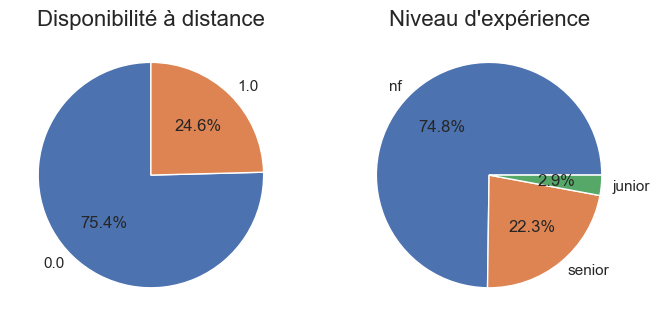

In [497]:
remote_data = d['Remote'].value_counts()
seniority_data = d['seniority'].value_counts()
# print("remote_data",remote_data)
# print("seniority_data",seniority_data)

plt.subplot(1, 2, 1)
plt.pie(remote_data, labels=remote_data.index, autopct='%1.1f%%', startangle=90)
plt.title("Disponibilité à distance", fontsize=16)

plt.subplot(1, 2, 2)
plt.pie(seniority_data, labels=seniority_data.index, autopct="%.1f%%")
plt.title("Niveau d'expérience",fontsize=16)

plt.show()


###  Salary analysis :

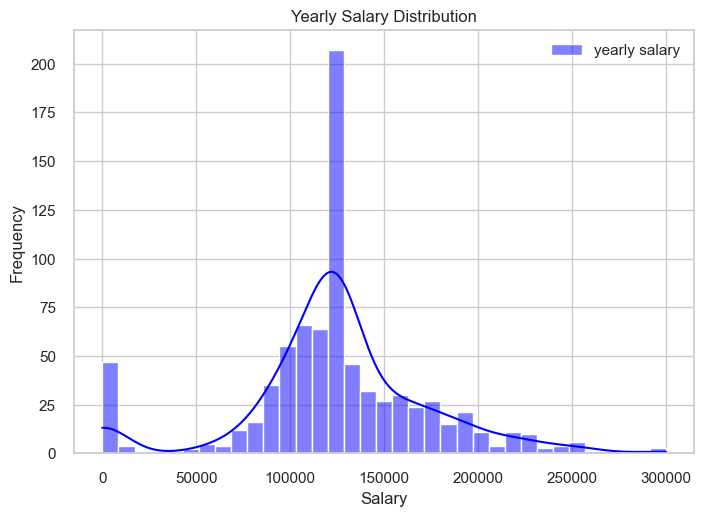

In [644]:
# min_salary_data = d['Salary ($) /yr'].dropna() / 1000
fig, ax = plt.subplots()
sns.set(style="whitegrid")
sns.histplot(d['Salary ($) /yr'], kde=True, color='blue', label='yearly salary')
ax.set_xlabel('Salary')
ax.set_ylabel('Frequency')
ax.set_title('Yearly Salary Distribution')
plt.legend()
plt.show()


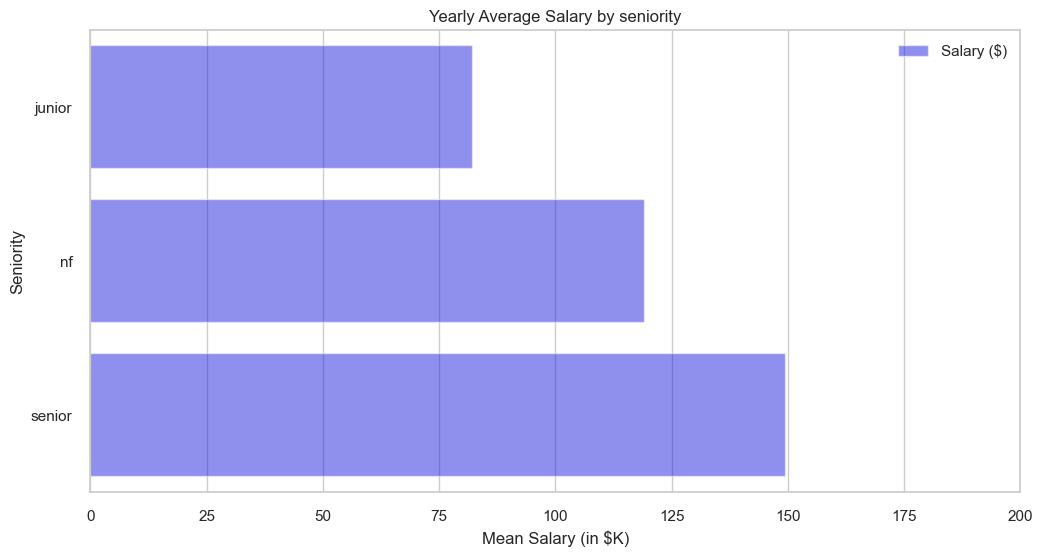

In [693]:
# Group the data by 'Title' and calculate descriptive statistics for salaries
title_salary_stats = d.groupby('seniority')['Salary ($) /yr'].describe()
plt.figure(figsize=(12, 6))
sns.barplot(x=title_salary_stats['mean'] / 1000, y=title_salary_stats.index, color='blue', alpha=0.5, label='Salary ($)')
plt.xlabel('Mean Salary (in $K)')
plt.ylabel('Seniority')
plt.title('Yearly Average Salary by seniority')
plt.legend()

# Adjust the axis scales if necessary
plt.xlim(0, 200)  # Set the x-axis scale according to your data

plt.show()

### Company Rating Analysis (Rating):

In [649]:
rating_stats = d['Rating'].describe()
rating_stats

count    793.000000
mean       3.415763
std        1.599484
min       -1.000000
25%        3.400000
50%        3.900000
75%        4.200000
max        5.000000
Name: Rating, dtype: float64

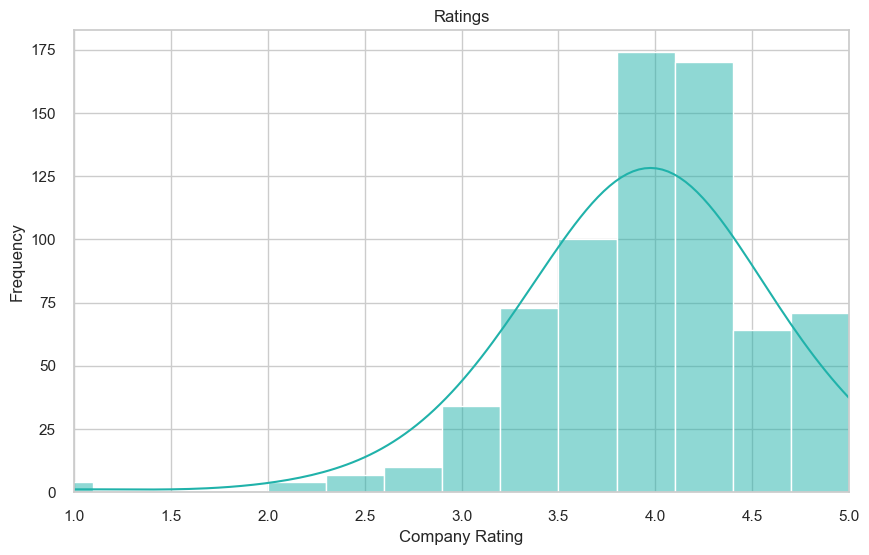

In [651]:
# Filter out entries with -1 ratings
filtered_df = d[d['Rating'] != -1]

# Calculate descriptive statistics for company ratings
rating_stats = d['Rating'].describe()

# Create a histogram for company ratings
plt.figure(figsize=(10, 6))
sns.histplot(d['Rating'], bins=20, color='lightseagreen', kde=True)
plt.xlabel('Company Rating')
plt.ylabel('Frequency')
plt.title('Ratings')
plt.xlim(1, 5)  # Set the x-axis range to typical ratings
plt.show()

### Location Analysis (Location):

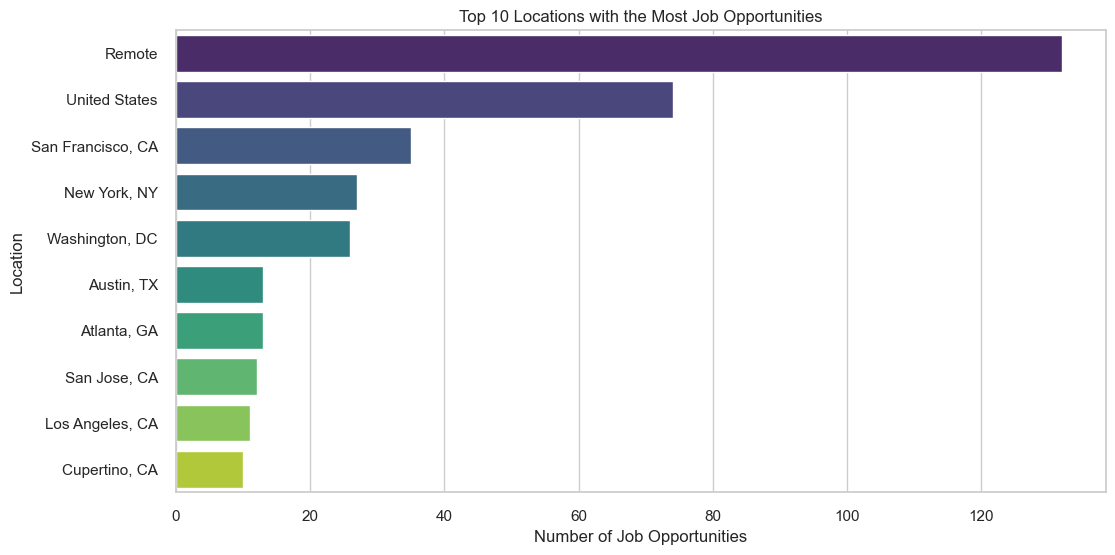

In [652]:
# Group the data by 'Location' and count the number of job opportunities
location_counts = d['Location'].value_counts().reset_index()
location_counts.columns = ['Location', 'Job Opportunities']

# Sort the locations based on job opportunities in descending order
location_counts = location_counts.sort_values(by='Job Opportunities', ascending=False)

# Visualize the top locations with the most job opportunities using a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Job Opportunities', y='Location', data=location_counts.head(10), palette='viridis')
plt.xlabel('Number of Job Opportunities')
plt.ylabel('Location')
plt.title('Top 10 Locations with the Most Job Opportunities')
plt.show()

### Company Size Analysis (Size):

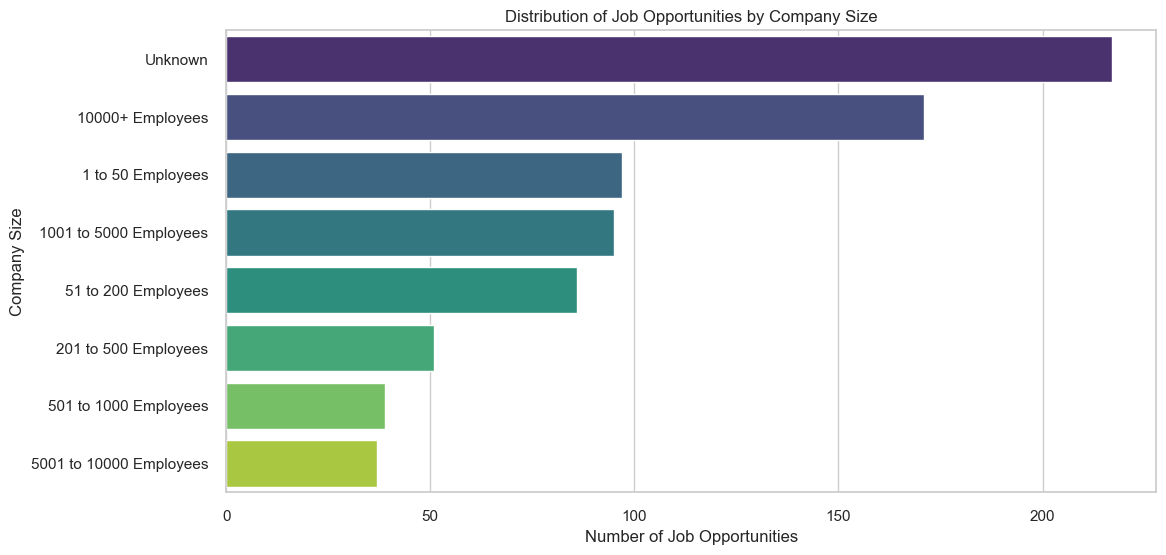

In [653]:
# Group the data by 'Size' and count the number of job opportunities
size_counts = d['Size'].value_counts().reset_index()
size_counts.columns = ['Company Size', 'Job Opportunities']

# Sort the company sizes based on job opportunities in descending order
size_counts = size_counts.sort_values(by='Job Opportunities', ascending=False)

# Visualize the distribution of job opportunities by company size using a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Job Opportunities', y='Company Size', data=size_counts, palette='viridis')
plt.xlabel('Number of Job Opportunities')
plt.ylabel('Company Size')
plt.title('Distribution of Job Opportunities by Company Size')
plt.show()

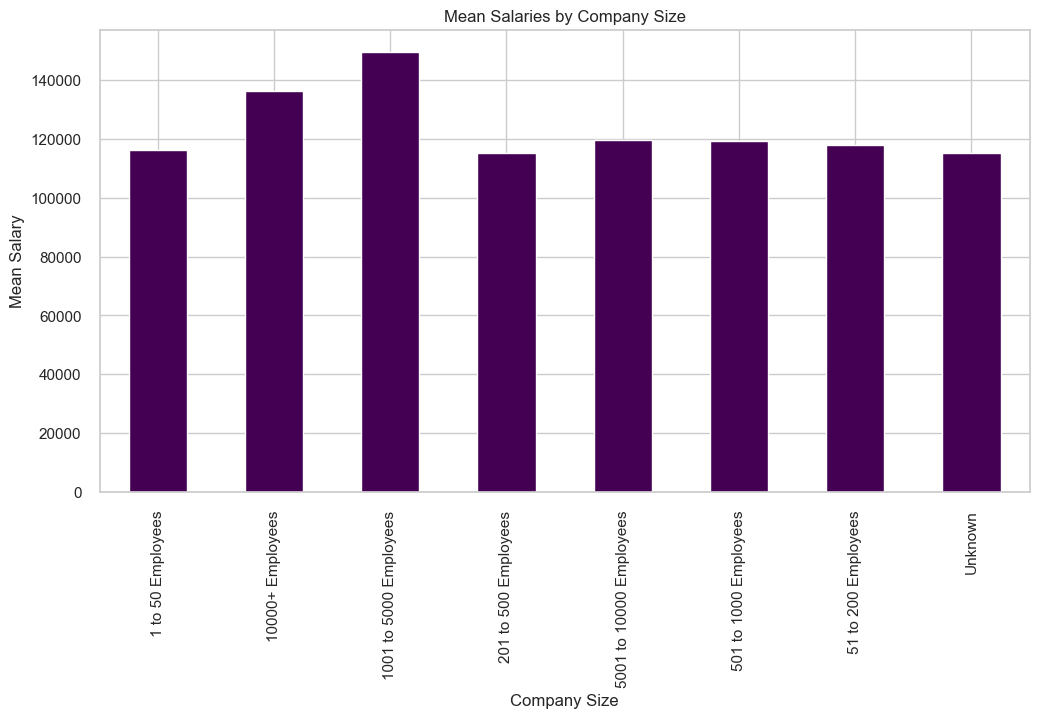

In [655]:
# Group the data by 'Size' and calculate the mean salaries
size_salary_means = d.groupby('Size')['Salary ($) /yr'].mean()

# Create a stacked bar chart to show the mean salaries for each company size
size_salary_means.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.xlabel('Company Size')
plt.ylabel('Mean Salary')
plt.title('Mean Salaries by Company Size')
plt.show()

###  Company Founded Year Analysis (Founded):

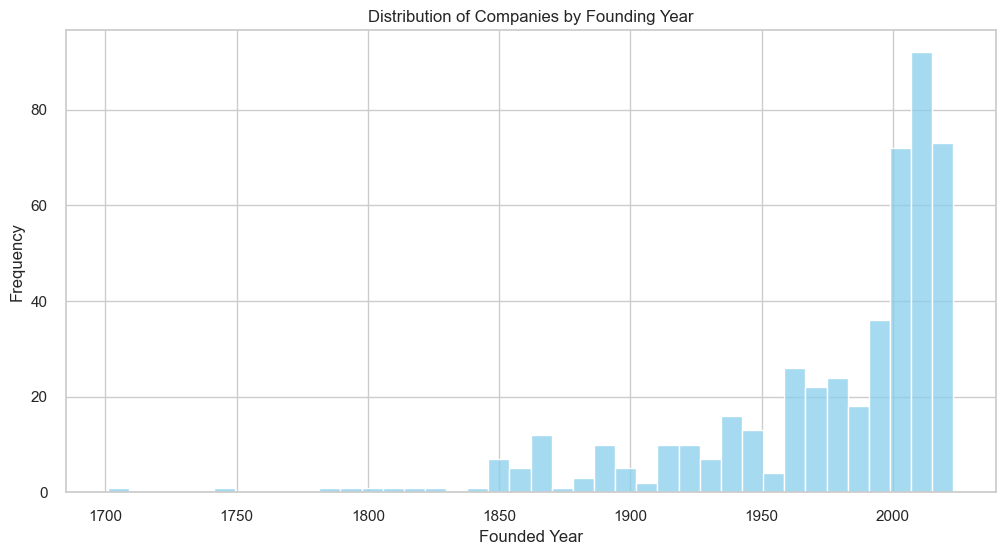

In [658]:
# Filter out entries with unknown or missing founded years
filtered_df = d[d['Founded'] > 0]

compensation_by_founded_year = filtered_df.groupby('Founded')['Salary ($) /yr'].mean()

# Analyze Influence on Ratings
ratings_by_founded_year = filtered_df.groupby('Founded')['Rating'].mean()

# Visualize the Distribution of Companies by Founding Year
plt.figure(figsize=(12, 6))
sns.histplot(filtered_df['Founded'], bins=40, color='skyblue')
plt.xlabel('Founded Year')
plt.ylabel('Frequency')
plt.title('Distribution of Companies by Founding Year')

plt.show()

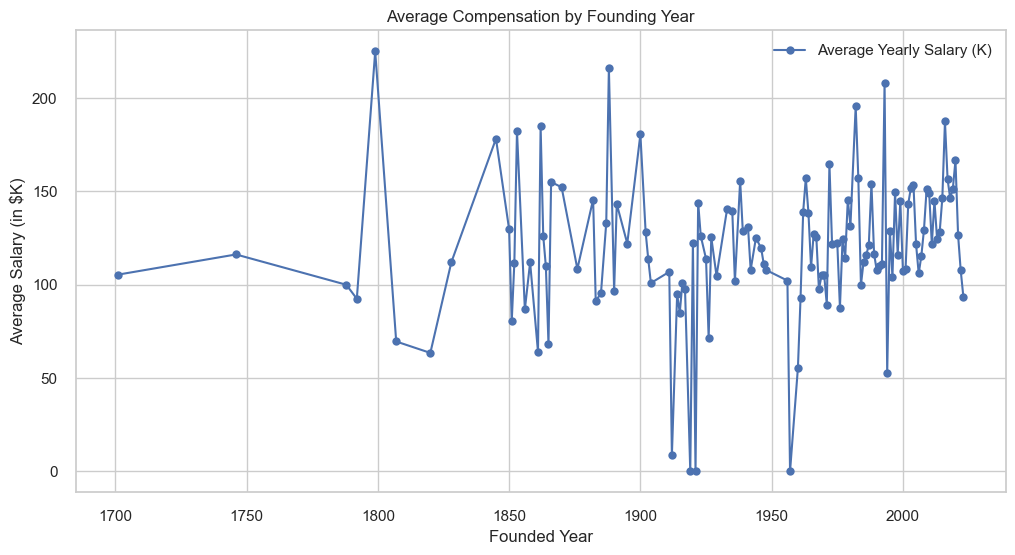

In [660]:
# Filter out entries with unknown or missing founded years
filtered_df = d[d['Founded'] > 0]

# Calculate the average Min Salary and Max Salary for companies founded in different years
compensation_by_founded_year = filtered_df.groupby('Founded')['Salary ($) /yr'].mean()

# Visualize the Average Compensation by Founding Year
plt.figure(figsize=(12, 6))
plt.plot(compensation_by_founded_year.index, compensation_by_founded_year / 1000, marker='o', label='Average Yearly Salary (K)')
plt.xlabel('Founded Year')
plt.ylabel('Average Salary (in $K)')
plt.title('Average Compensation by Founding Year')
plt.legend()
plt.grid(True)
plt.show()

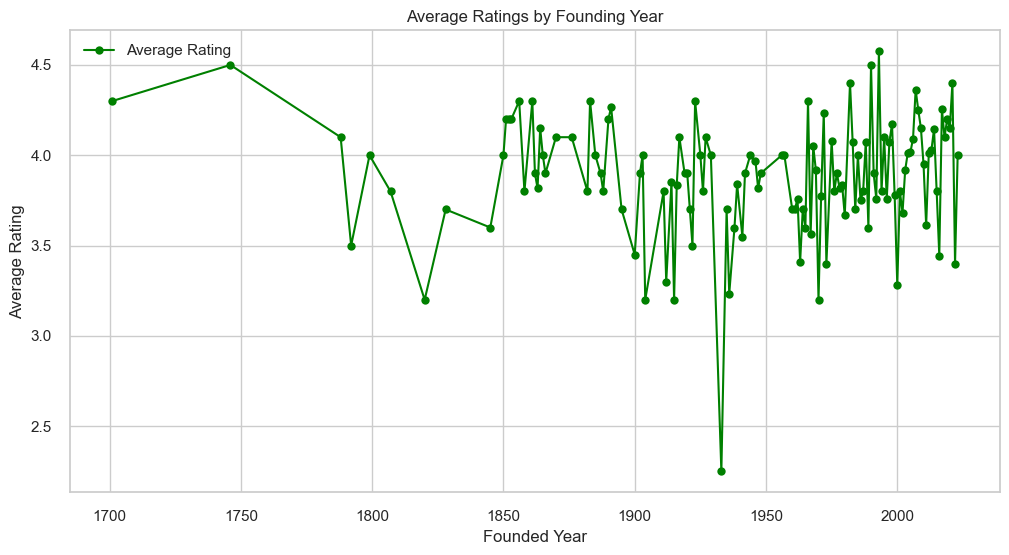

In [664]:
# Filter out entries with unknown or missing founded years
filtered_df = d[d['Founded'] > 0]

# Calculate the average company ratings for companies founded in different years
ratings_by_founded_year = filtered_df.groupby('Founded')['Rating'].mean()

# Visualize the Average Ratings by Founding Year
plt.figure(figsize=(12, 6))
plt.plot(ratings_by_founded_year.index, ratings_by_founded_year, marker='o', color='green', label='Average Rating')
plt.xlabel('Founded Year')
plt.ylabel('Average Rating')
plt.title('Average Ratings by Founding Year')
plt.legend()
plt.grid(True)
plt.show()

### Type of Ownership Analysis (Type of Ownership):

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Company - Public'),
  Text(1, 0, 'Government'),
  Text(2, 0, 'Company - Private'),
  Text(3, 0, 'Unknown'),
  Text(4, 0, 'Nonprofit Organization'),
  Text(5, 0, 'College / University'),
  Text(6, 0, 'Hospital'),
  Text(7, 0, 'Subsidiary or Business Segment'),
  Text(8, 0, 'Contract'),
  Text(9, 0, 'Self-employed'),
  Text(10, 0, 'Private Practice / Firm')])

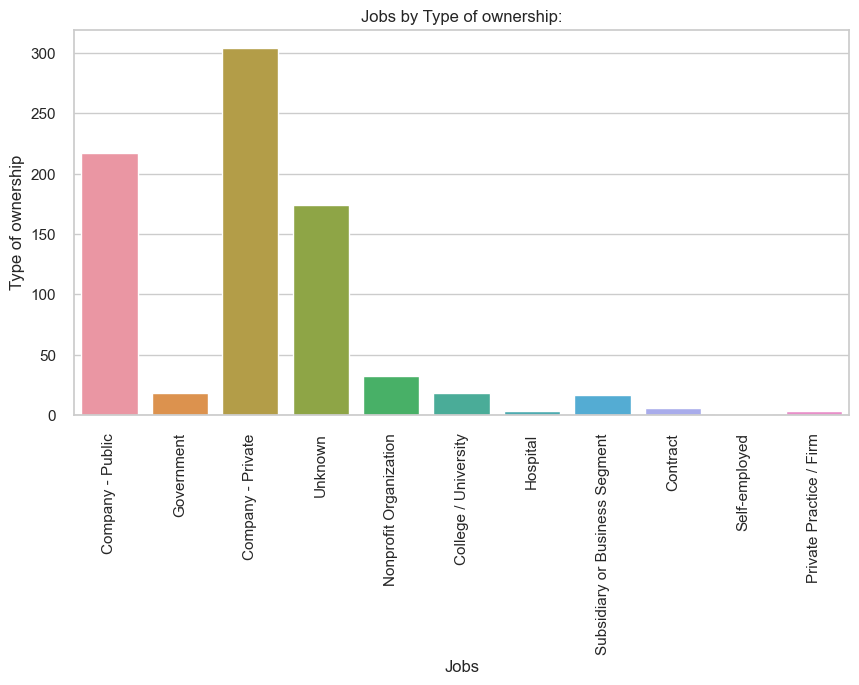

In [665]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x='Type of ownership', data=d)
plt.title('Jobs by Type of ownership:')
plt.ylabel('Type of ownership')
plt.xlabel('Jobs')
plt.xticks(rotation=90)

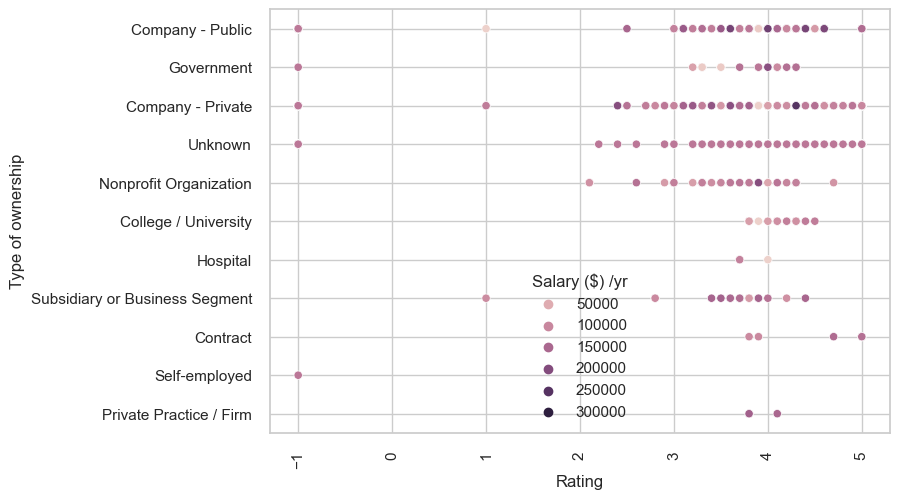

In [682]:
sns.scatterplot(data=d, x="Rating", y="Type of ownership", hue="Salary ($) /yr")
plt.xticks(rotation=90)
plt.show()

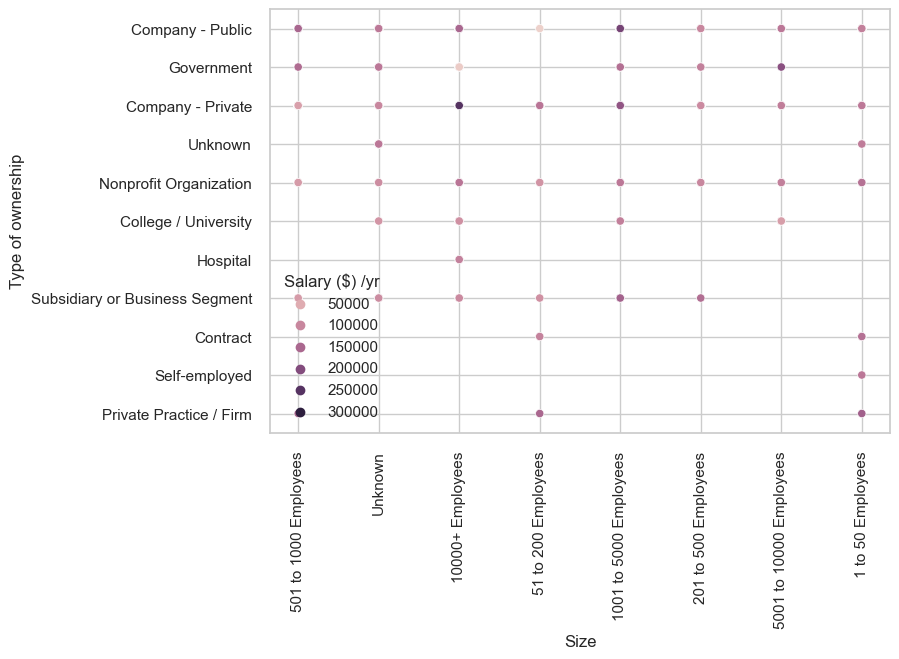

In [683]:
sns.scatterplot(data=d, x="Size", y="Type of ownership", hue="Salary ($) /yr")
plt.xticks(rotation=90)
plt.show()

 ### Industry and Sector Analysis (Industry and Sector):

Text(0.5, 0, 'Jobs')

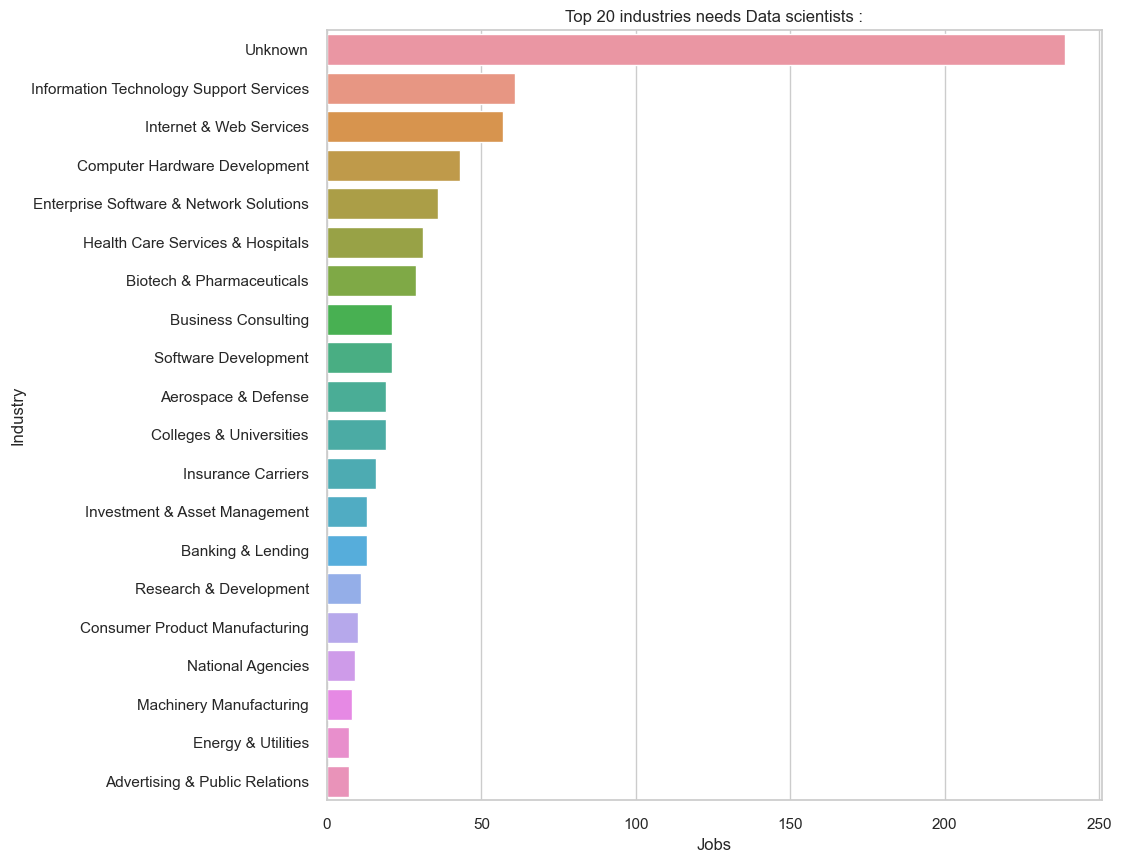

In [667]:
# sns.countplot(data=d,x='Industry')
# d.groupby(d["Industry"]).size().plot(kind="bar",color='b')

jobs_by_Industry = d['Industry'].value_counts().head(20)
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x=jobs_by_Industry, y=jobs_by_Industry.index, data=d, orient='h')
plt.title('Top 20 industries needs Data scientists :')
plt.ylabel('Industry')
plt.xlabel('Jobs')

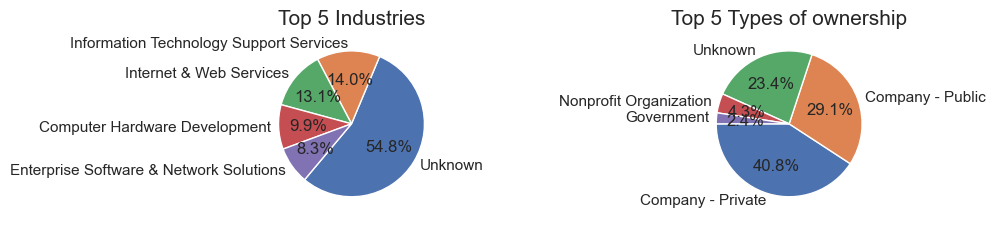

In [670]:
industry_data = d['Industry'].value_counts().head(5)
type_data = d['Type of ownership'].value_counts().head(5)

plt.subplot(1, 3, 1)
plt.pie(industry_data, labels=industry_data.index, autopct='%1.1f%%', startangle=230)
plt.title("Top 5 Industries", fontsize=15)

plt.subplot(1, 3, 3)
plt.pie(type_data, labels=type_data.index, autopct='%1.1f%%', startangle=180)
plt.title("Top 5 Types of ownership",fontsize=15)

plt.show()

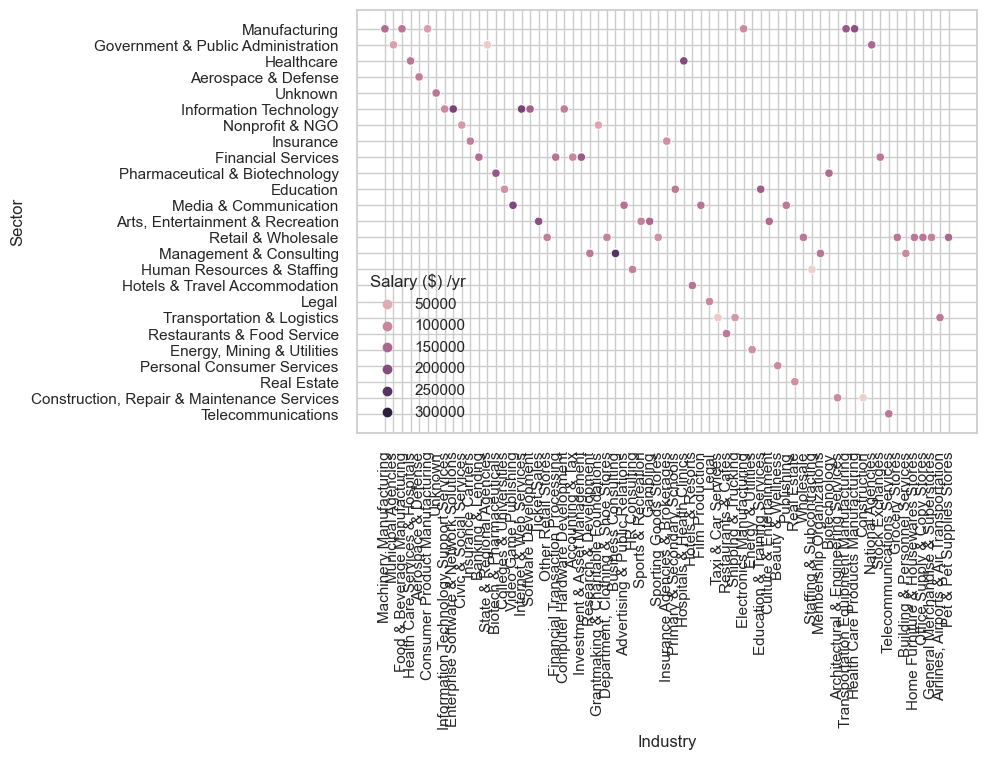

In [684]:
sns.scatterplot(data=d, x="Industry", y="Sector", hue="Salary ($) /yr")
plt.xticks(rotation=90)
plt.show()

- after defining the how data science jobs are ditributed by revenue, rating, type of ownership ....
- now we'll try to answer the question how to find the best offer to apply for a data scientist job ?

### company_public

<Axes: xlabel='Industry'>

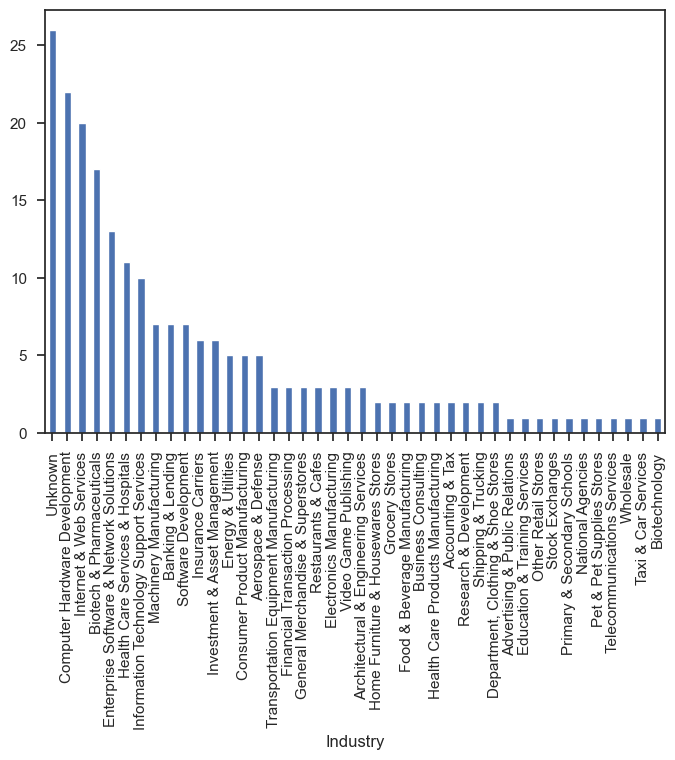

In [541]:
company_public = d[d['Type of ownership']== 'Company - Public']
public_industry = company_public['Industry'].value_counts()
public_industry.plot(kind="bar")

Text(0.5, 1.0, 'les secteurs des entreprises publiques qui demandent les data scientist')

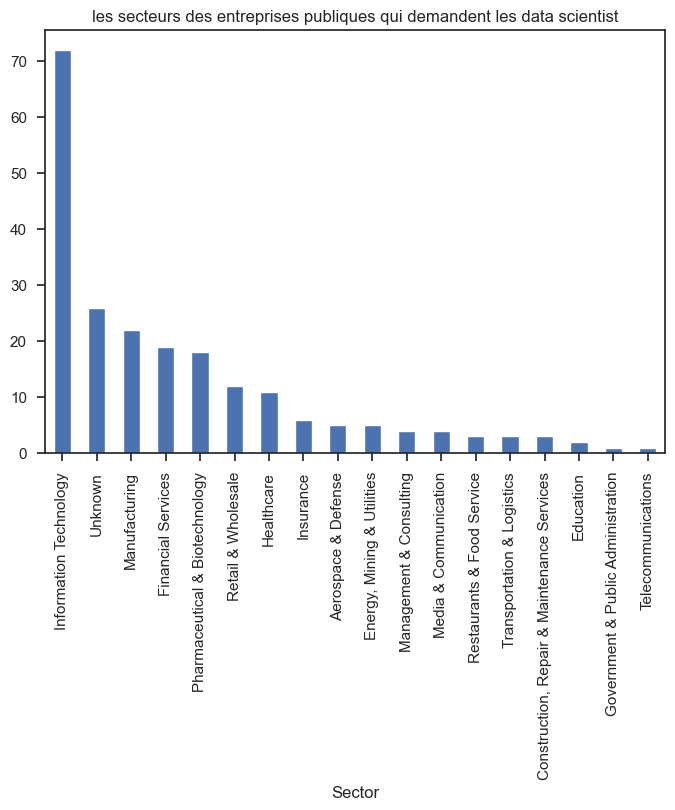

In [632]:
public_sector = company_public['Sector'].value_counts()
p= public_sector.plot(kind="bar")
plt.title('les secteurs des entreprises publiques qui demandent les data scientist'  )

<Axes: xlabel='Industry'>

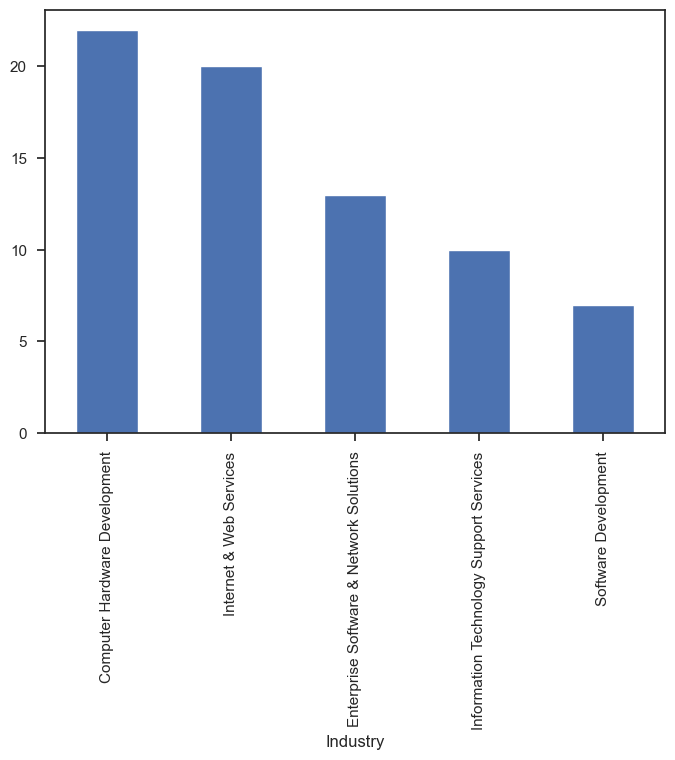

In [598]:
public_tech_industry = company_public[company_public['Sector']=='Information Technology']['Industry'].value_counts()
public_tech_industry.plot(kind="bar")

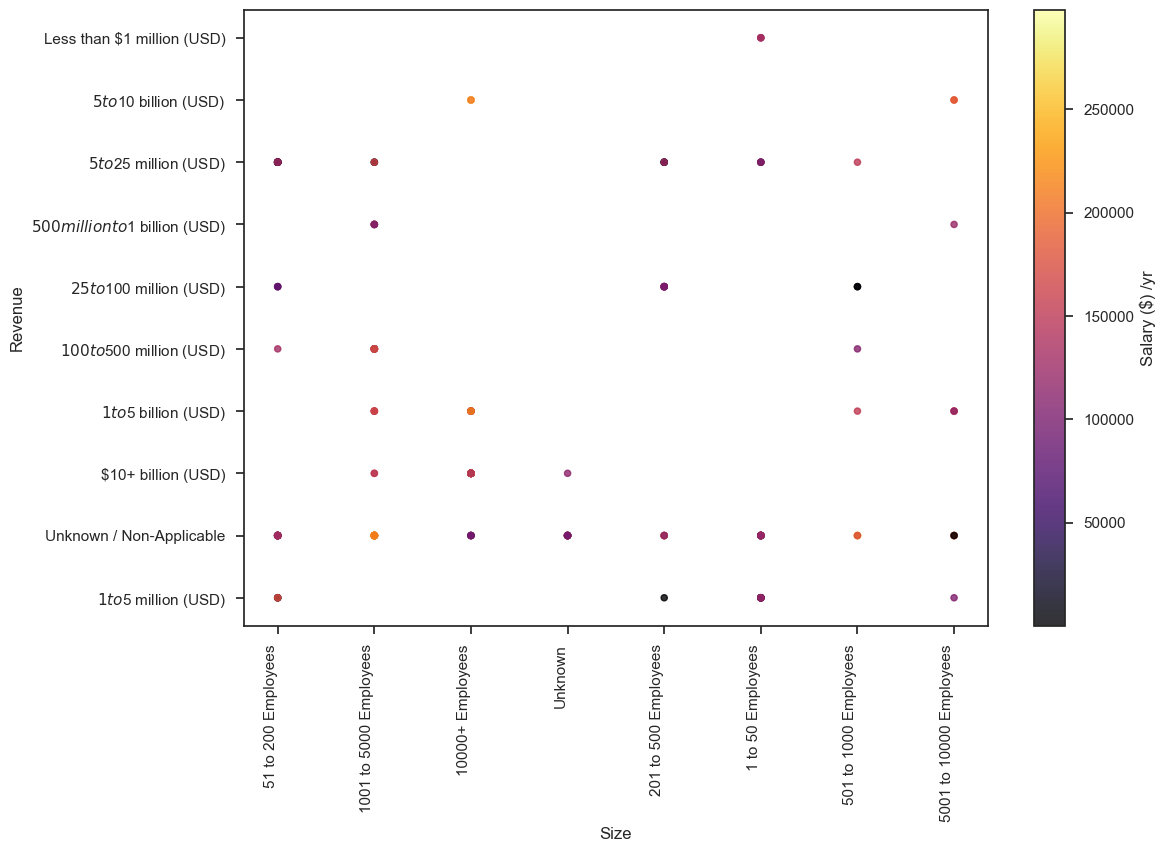

In [580]:
public_tech = d[d['Sector']=='Information Technology']

public_tech.plot(
    kind='scatter',
    x='Size',
    y='Revenue',
    c='Salary ($) /yr',
    cmap='inferno',
    colorbar=True,
    alpha=0.8,
    figsize=(12,8)
)
# Rotate x-axis tick labels by 45 degrees
plt.xticks(rotation=90)

# Optionally, adjust label alignment to prevent overlapping
plt.xticks(ha='right')  # Align labels to the right

plt.show()


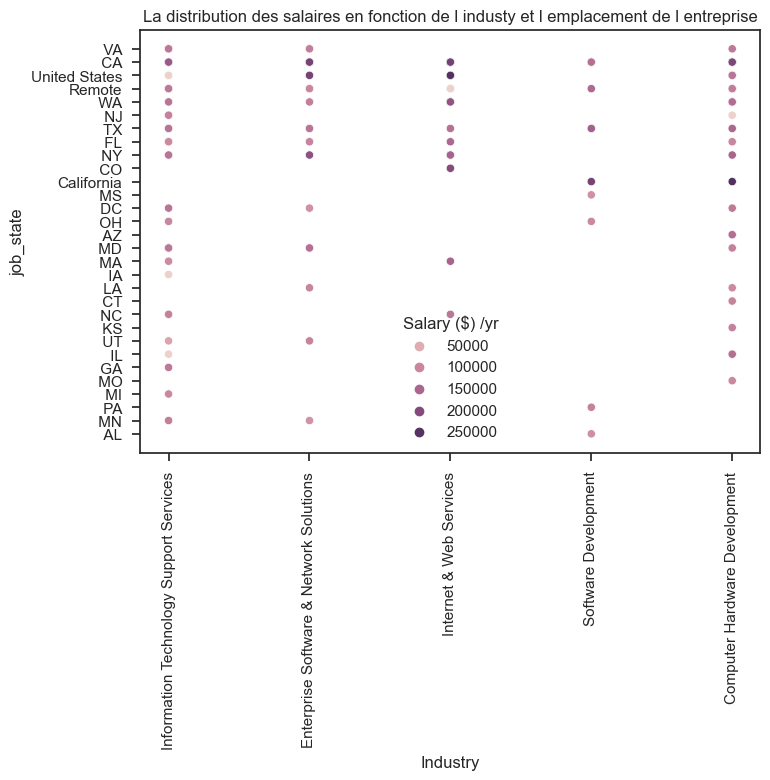

In [633]:
public_tech_industry = d[d['Sector']=='Information Technology']
sns.scatterplot(data=public_tech_industry, x="Industry", y="job_state", hue="Salary ($) /yr")
plt.xticks(rotation=90)
plt.title('La distribution des salaires en fonction de l industy et l emplacement de l entreprise' )
plt.show()

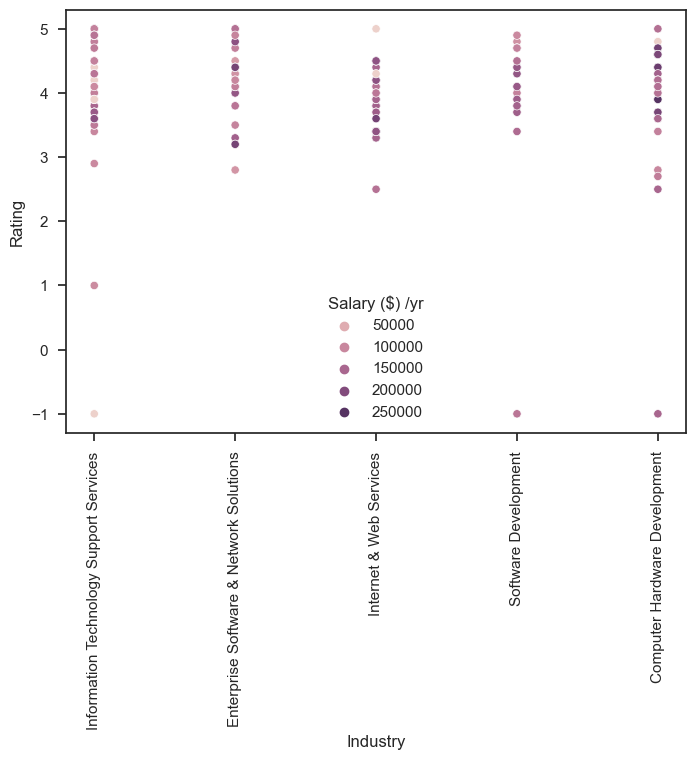

In [587]:
public_tech_industry = d[d['Sector']=='Information Technology']
sns.scatterplot(data=public_tech_industry, x="Industry", y="Rating", hue="Salary ($) /yr")
plt.xticks(rotation=90)
plt.show()

### private Companies

<Axes: xlabel='Sector'>

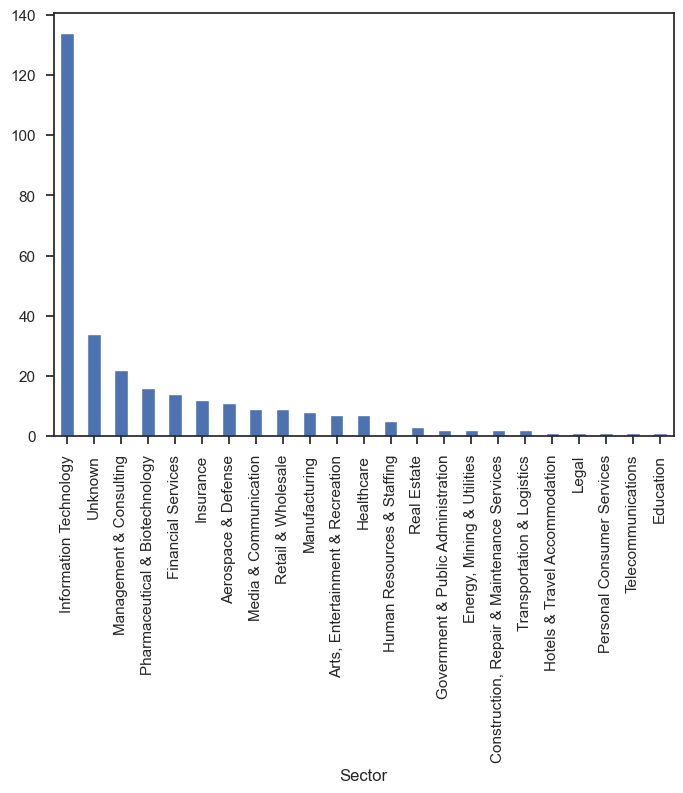

In [595]:
company_private = d[d['Type of ownership']== 'Company - Private']
private_sector = company_private['Sector'].value_counts()
private_sector.plot(kind="bar")

# private_industry = company_private['Industry'].value_counts()
# private_industry.plot(kind="bar")

<Axes: xlabel='Industry'>

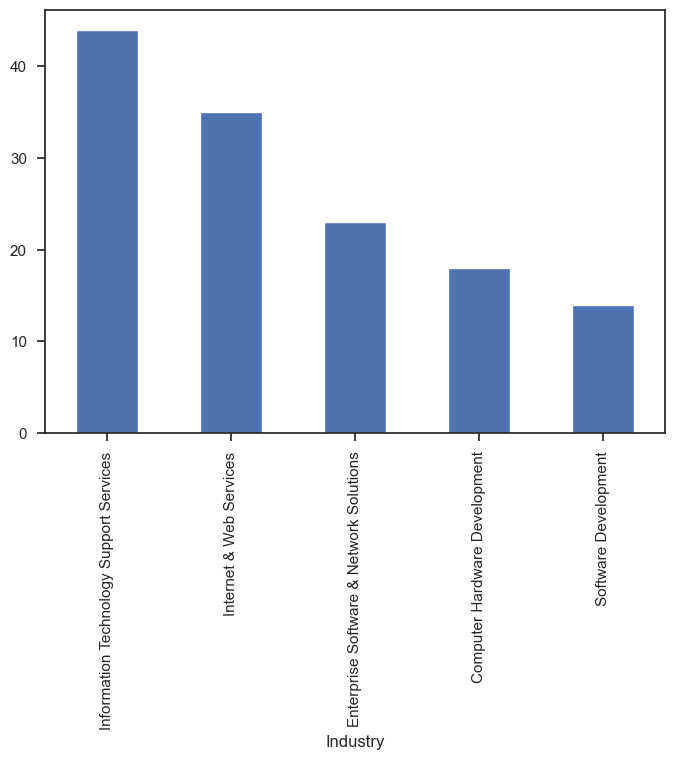

In [597]:
private_tech_industry =company_private[company_private['Sector']=='Information Technology']['Industry'].value_counts()
private_tech_industry.plot(kind="bar")

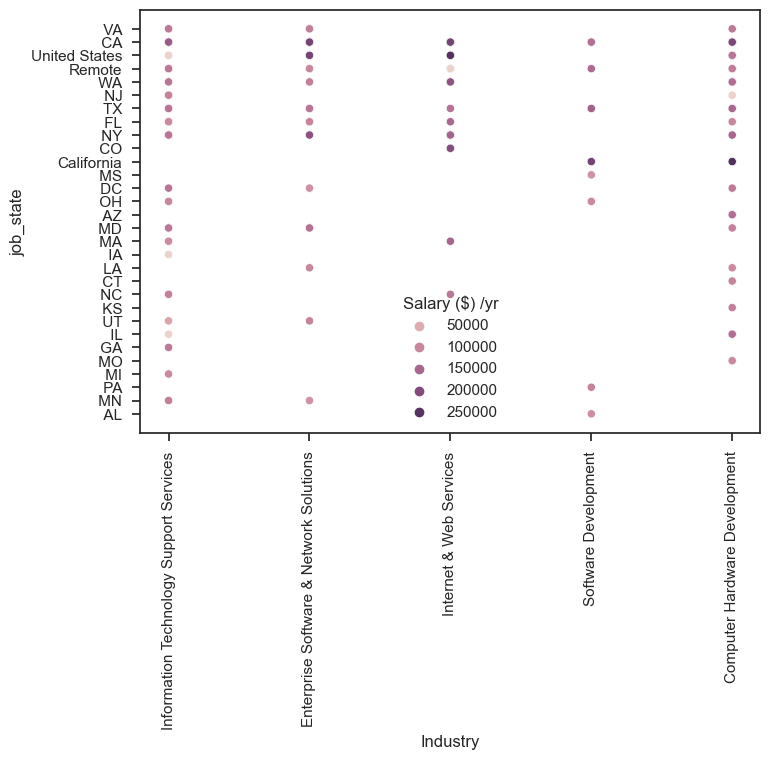

In [600]:
private_tech_industry = d[d['Sector']=='Information Technology']
sns.scatterplot(data=private_tech_industry, x="Industry", y="job_state", hue="Salary ($) /yr")
plt.xticks(rotation=90)
plt.show()

### Revenue Analysis (Revenue)

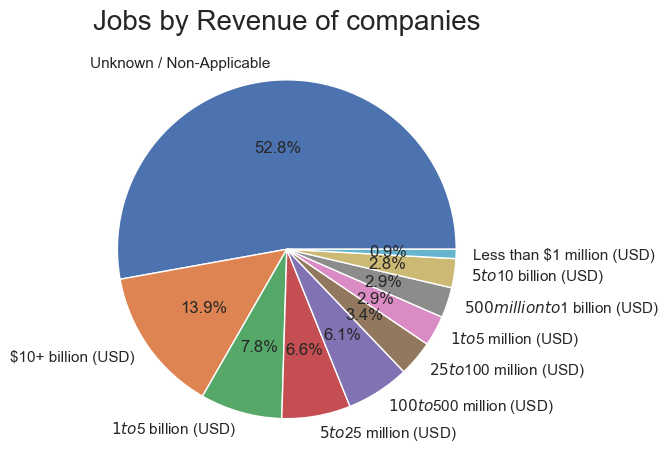

In [674]:
jobs_by_revenue = d["Revenue"].value_counts()
plt.pie(jobs_by_revenue, labels=jobs_by_revenue.index, autopct='%1.1f%%')
plt.title("Jobs by Revenue of companies", fontsize=20)
plt.show()

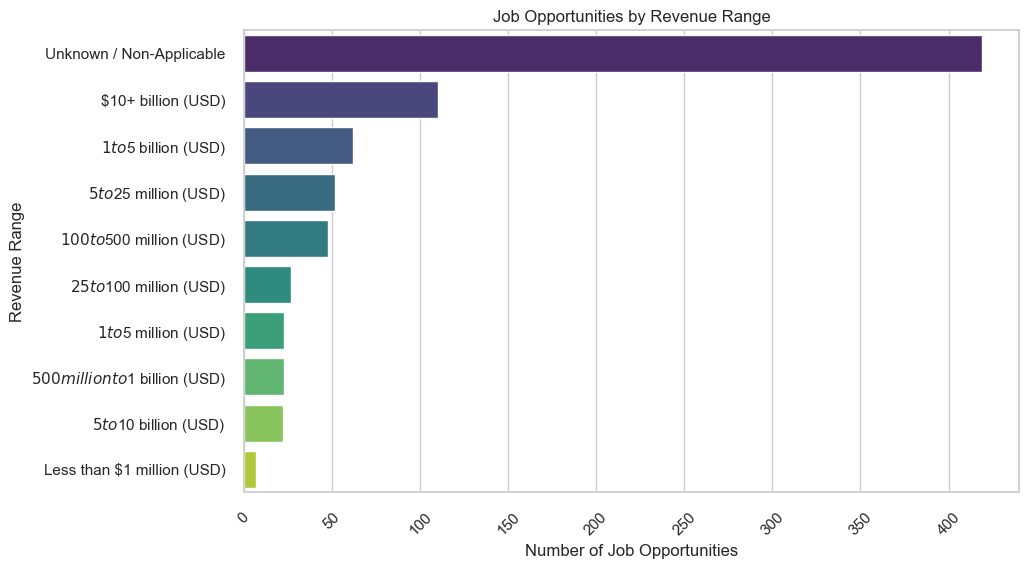

In [680]:


# Group the data by 'd' and count the number of job opportunities
revenue_counts = d['Revenue'].value_counts().reset_index()
revenue_counts.columns = ['Revenue Range', 'Job Opportunities']

# Sort the revenue ranges based on job opportunities in descending order
revenue_counts = revenue_counts.sort_values(by='Job Opportunities', ascending=False)

# Visualize the distribution of job opportunities by revenue range using a bar chart with inverted axes
plt.figure(figsize=(10, 6))
sns.barplot(x='Job Opportunities', y='Revenue Range', data=revenue_counts,  palette='viridis')
plt.xlabel('Number of Job Opportunities')
plt.ylabel('Revenue Range')
plt.title('Job Opportunities by Revenue Range')
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.show()


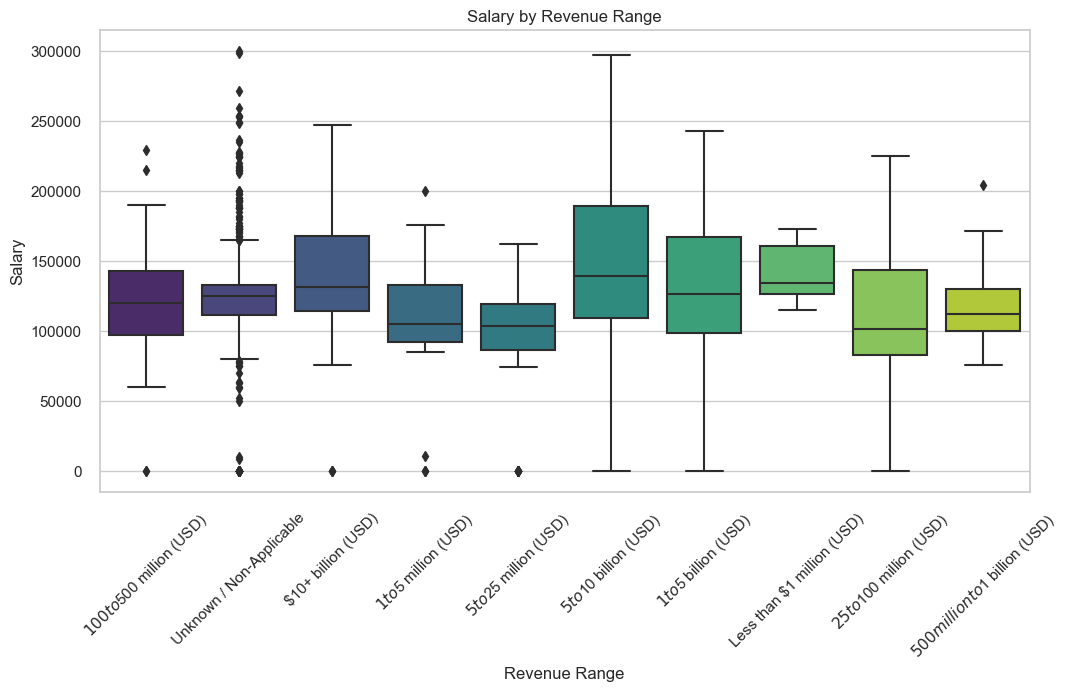

In [681]:
# Create box plots to visualize the distribution of Min Salary by Revenue Range
plt.figure(figsize=(12, 6))
sns.boxplot(data=d, x='Revenue', y='Salary ($) /yr', palette='viridis')
plt.xlabel('Revenue Range')
plt.ylabel('Salary')
plt.title('Salary by Revenue Range')
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.show()

### Job Description Keyword Analysis (Job Description):

In [330]:
!pip install -U yellowbrick

     ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
     - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
     ---- -------------------------------- 30.7/282.6 kB 330.3 kB/s eta 0:00:01
     -------- ---------------------------- 61.4/282.6 kB 409.6 kB/s eta 0:00:01
     ------------------- ---------------- 153.6/282.6 kB 766.6 kB/s eta 0:00:01
     ------------------------------- ------ 235.5/282.6 kB 1.0 MB/s eta 0:00:01
     -------------------------------------- 282.6/282.6 kB 1.1 MB/s eta 0:00:00


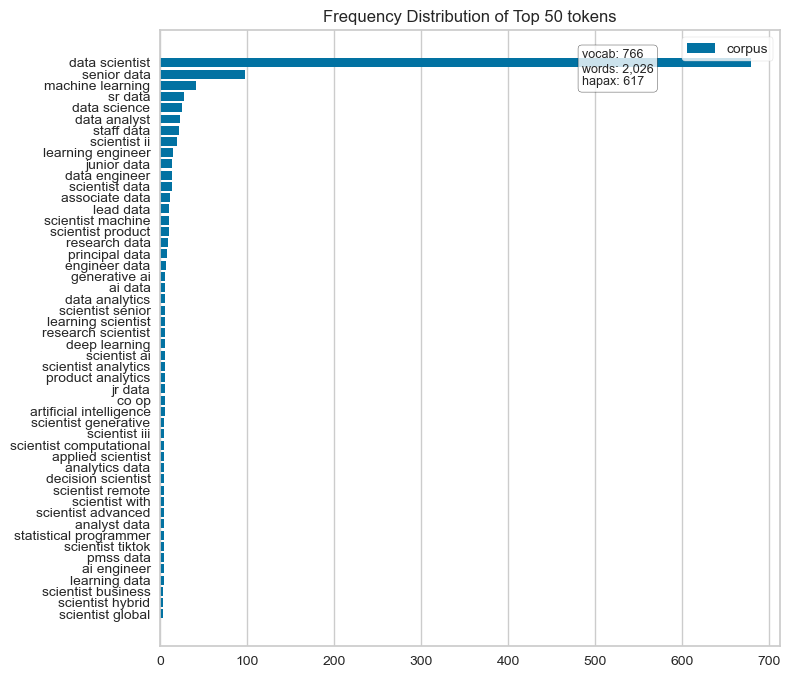

<Axes: title={'center': 'Frequency Distribution of Top 50 tokens'}>

In [331]:
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text import FreqDistVisualizer
from yellowbrick.datasets import load_hobbies

vec = CountVectorizer(analyzer='word', ngram_range=(2, 2))
docs = vec.fit_transform(d["Job Title"])
features = vec.get_feature_names_out()

visualizer = FreqDistVisualizer(features=features, orient='h' , size = (800,800))
visualizer.fit(docs)
visualizer.show()

In [335]:
import string
import nltk

d['Job Description'] = d['Job Description'].replace('\n\n' , " " , regex = True)
d['Job Description'] = d['Job Description'].replace('\n' , " " , regex = True)

d['Job Description'] = d['Job Description'].replace('\n\n' , " " , regex = True)
d['Job Description'] = d['Job Description'].replace('\n' , " " , regex = True)
#Let's remove punctuation and Stopwords

def Remove_puncutations_stopwords(s):
    s = ''.join([i for i in s if i not in string.punctuation])
    stop_words = set(nltk.corpus.stopwords.words('english'))  # Load stopwords
    s = ' '.join([word for word in s.split() if word not in stop_words])
    return s

d['Job Description'] = d['Job Description'].apply(lambda x : Remove_puncutations_stopwords(x))

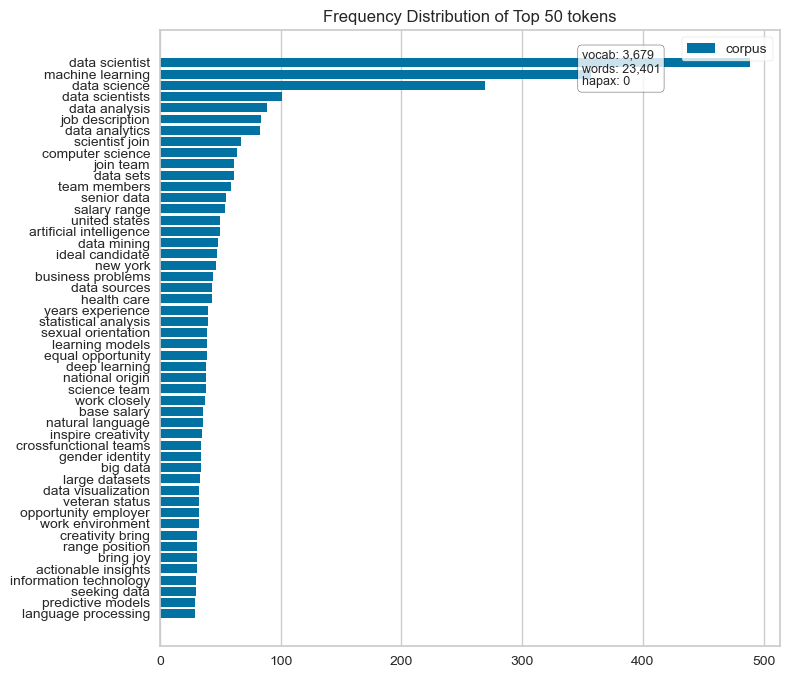

<Axes: title={'center': 'Frequency Distribution of Top 50 tokens'}>

In [339]:
vec = CountVectorizer(min_df= 3 , stop_words = 'english' , ngram_range = (2,2))
docs = vec.fit_transform(d['Job Description'])
features = vec.get_feature_names_out()

visualizer = FreqDistVisualizer(features=features, orient='h' , size = (800,800))
visualizer.fit(docs)
visualizer.show()

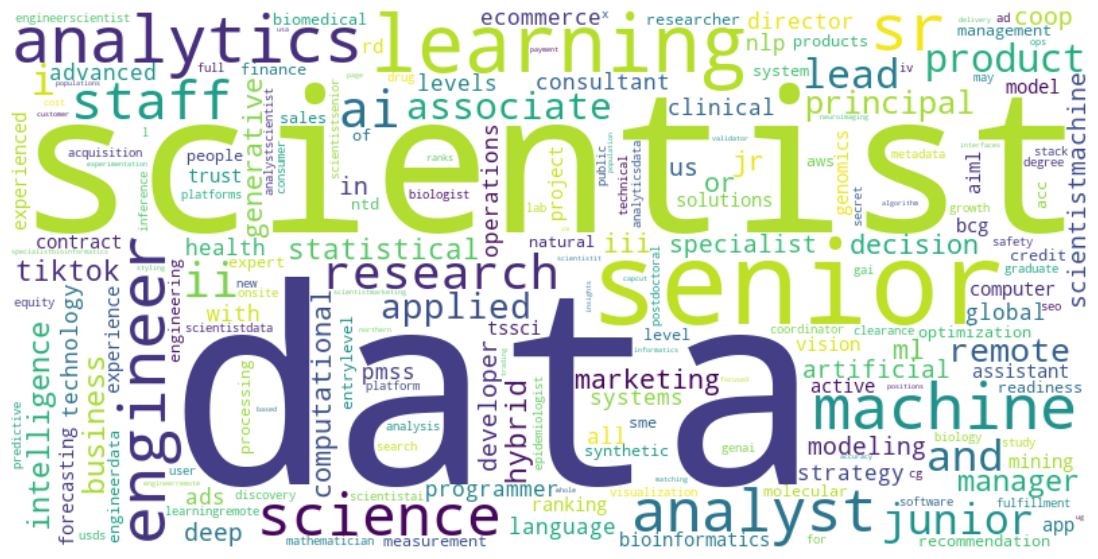

In [685]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import re

text = ' '.join(d['Job Title'].dropna().tolist())

# Nettoyage et prétraitement du texte
text = re.sub(r'[^a-zA-Z\s]', '', text)  # Suppression des caractères non alphabétiques
text = text.lower()  # Conversion en minuscules

# Comptage des mots
word_counts = Counter(text.split())
most_common_words = word_counts.most_common(20)

# Création d'un nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Affichage du nuage de mots
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

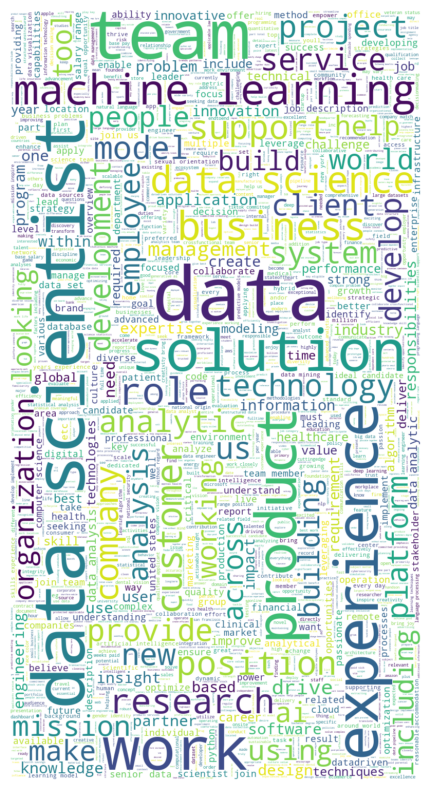

In [687]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

words = " ".join(d['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

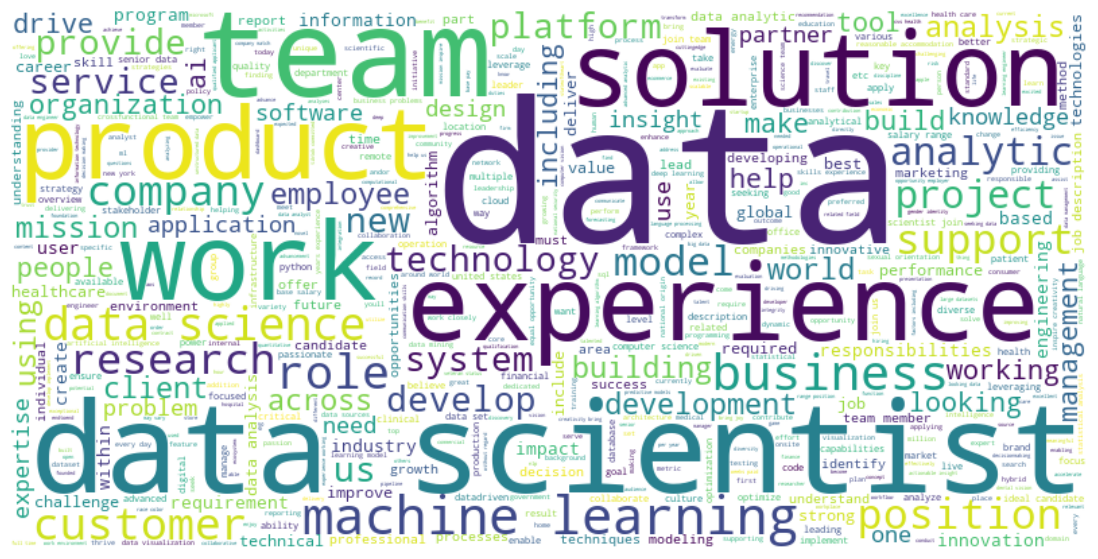

In [688]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

words = " ".join(d['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000,width=800, height=400)
wc.generate(text)

plt.figure(figsize=[15,7])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

# Analyse et modelisation des données 

<Axes: >

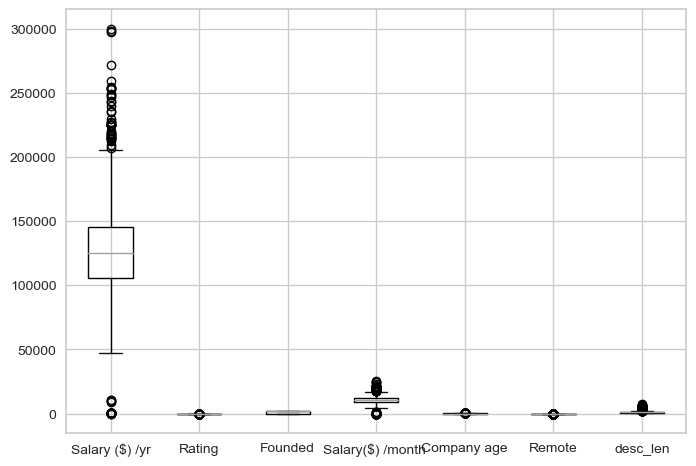

In [368]:
d[num].boxplot()

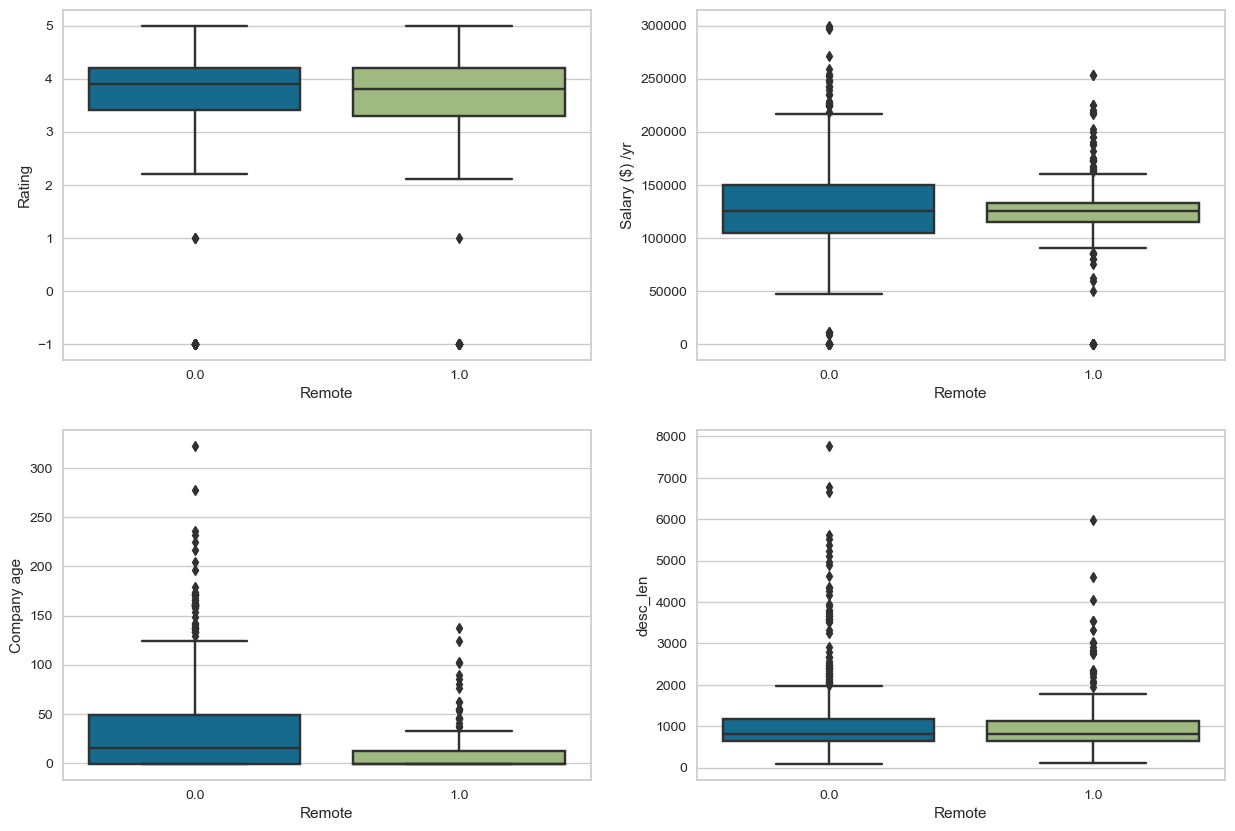

In [370]:
# Box plots to visualize the distribution of numerical columns
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x='Remote', y='Rating', data=d)

plt.subplot(2, 2, 2)
sns.boxplot(x='Remote', y='Salary ($) /yr', data=d)

plt.subplot(2, 2, 3)
sns.boxplot(x='Remote', y='Company age', data=d)

plt.subplot(2, 2, 4)
sns.boxplot(x='Remote', y='desc_len', data=d)
plt.show()

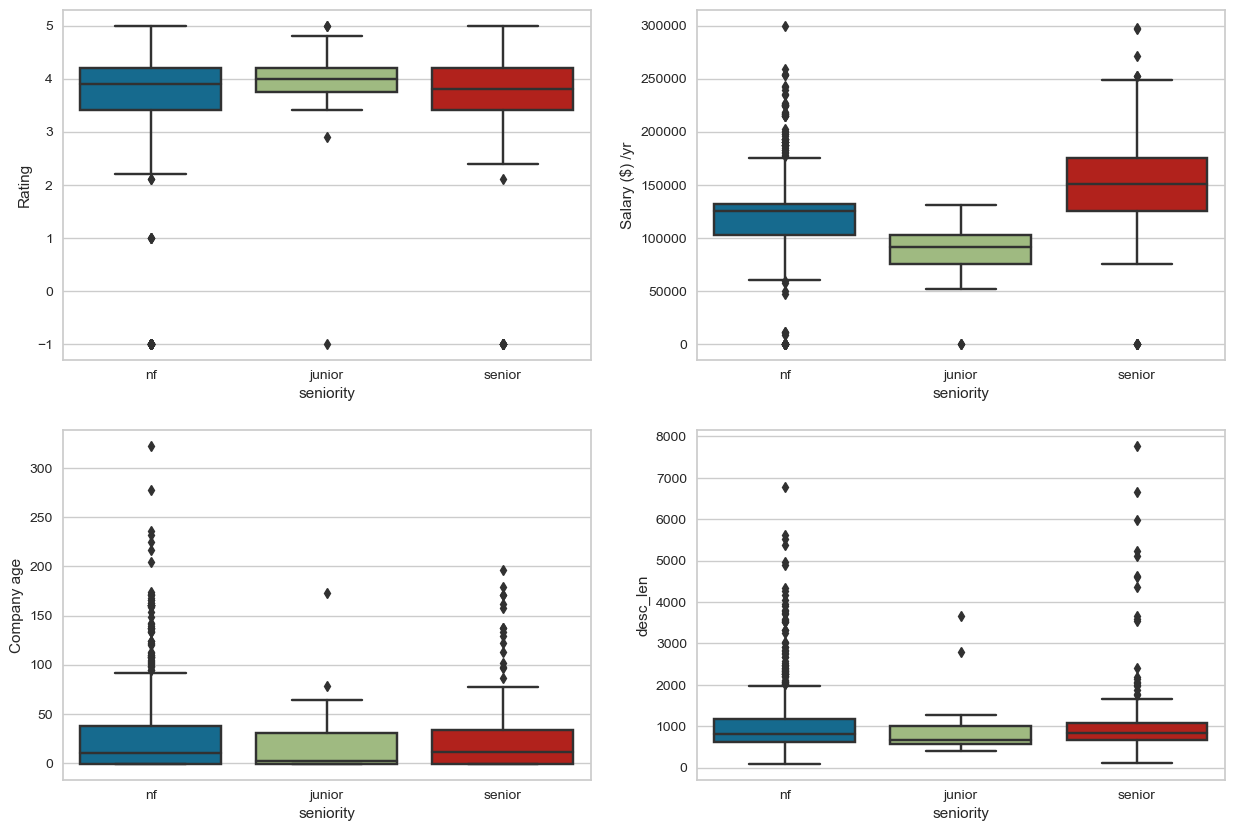

In [371]:
# Box plots to visualize the distribution of numerical columns
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x='seniority', y='Rating', data=d)

plt.subplot(2, 2, 2)
sns.boxplot(x='seniority', y='Salary ($) /yr', data=d)

plt.subplot(2, 2, 3)
sns.boxplot(x='seniority', y='Company age', data=d)

plt.subplot(2, 2, 4)
sns.boxplot(x='seniority', y='desc_len', data=d)
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


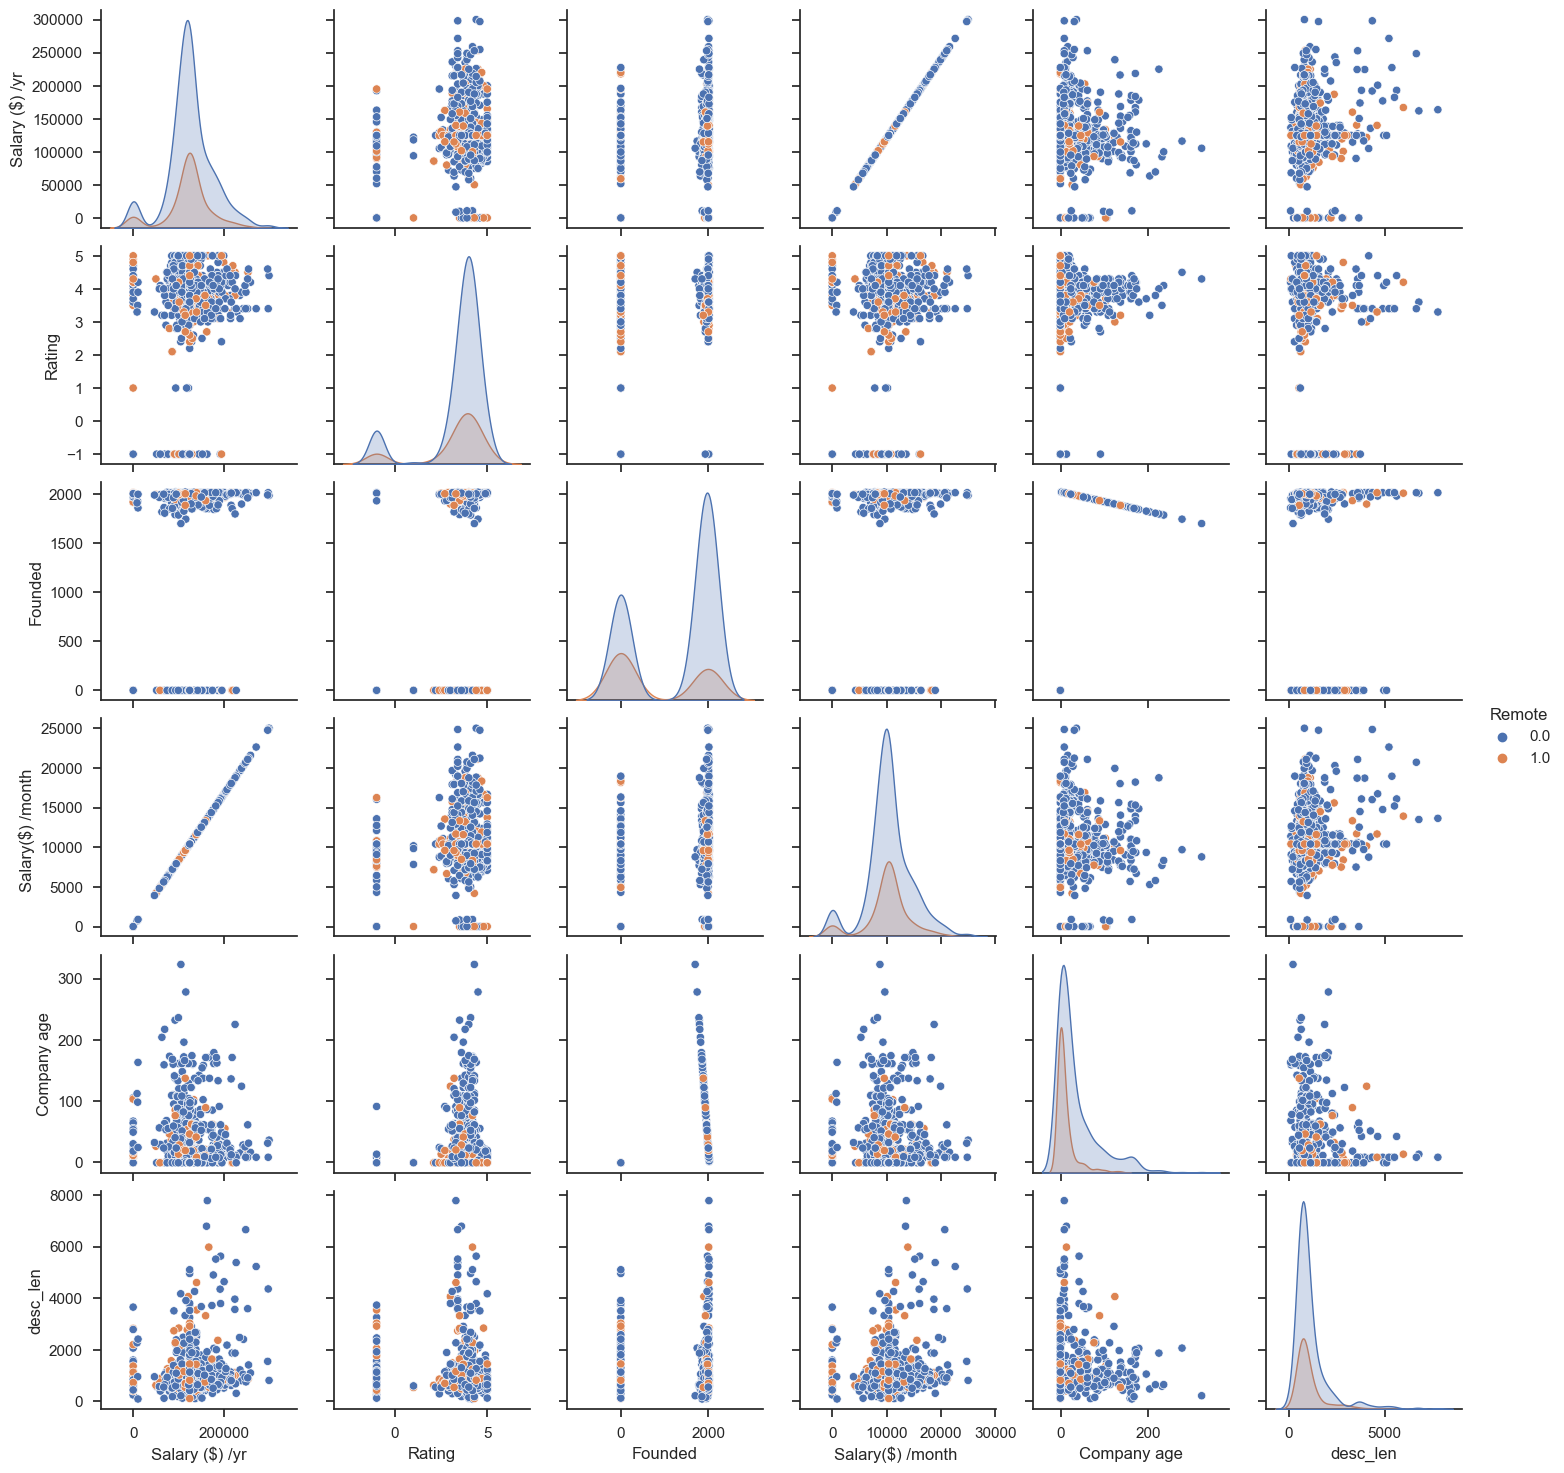

In [372]:
sns.set(style="ticks")
sns.pairplot(d, hue="Remote")

In [722]:
num

Index(['Salary ($) /yr', 'Rating', 'Founded', 'Salary($) /month ',
       'Company age', 'Remote', 'desc_len'],
      dtype='object')

In [378]:
d[['Salary ($) /yr', 'Rating','Company age', 'desc_len']].corr()

Salary ($) /yr    Rating  Company age  desc_len
Salary ($) /yr        1.000000  0.165905    -0.014918  0.197325
Rating                0.165905  1.000000     0.179959  0.012626
Company age          -0.014918  0.179959     1.000000 -0.001526
desc_len              0.197325  0.012626    -0.001526  1.000000

<Axes: >

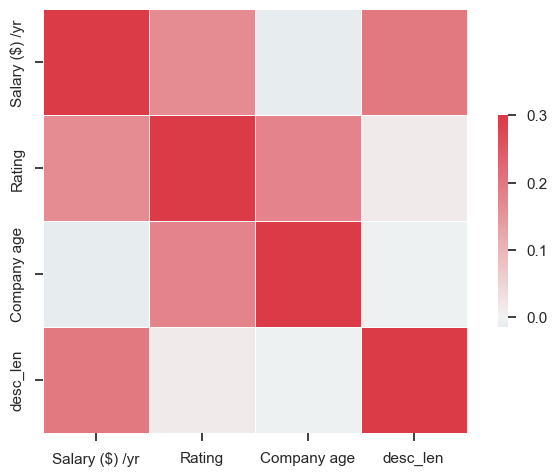

In [383]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(d[['Salary ($) /yr', 'Rating','Company age', 'desc_len']].corr(),vmax=.3, center=0, cmap=cmap,square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Visualisation de données multidimensionnelles et réduction de variables

In [384]:
X = d[['Salary ($) /yr', 'Rating','Company age', 'desc_len']]

# Appliquer une normalisation centrée-réduite aux données

La normalisation (standardisation) centrée-réduite consiste à soustraire la moyenne et à diviser par l'écart-type les valeurs d'expression. 

In [436]:
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()
x_scaled = Scaler.fit_transform(X)
x_scaled = pd.DataFrame(x_scaled, index=X.index, columns=X.columns) 
x_scaled

Salary ($) /yr    Rating  Company age  desc_len
0     -4.485389e-01  0.365496     0.006586 -0.186382
1     -9.065077e-01  0.302937    -0.643546 -0.701081
2      1.309347e-01  0.490616     2.845495 -0.677886
3      8.462212e-02 -0.197540     0.700060 -0.386298
4     -9.927017e-01  0.240377     0.570034  0.183626
..              ...       ...          ...       ...
795   -4.230268e-02 -2.762484    -0.643546 -0.504479
796   -7.497866e-08  0.615735    -0.643546 -0.306773
797   -6.009659e-01  0.428056    -0.123440 -0.005244
798   -7.497866e-08 -2.762484    -0.643546  0.040041
799   -1.159306e+00  0.365496    -0.123440 -0.600571

[793 rows x 4 columns]

<Axes: ylabel='Expression'>

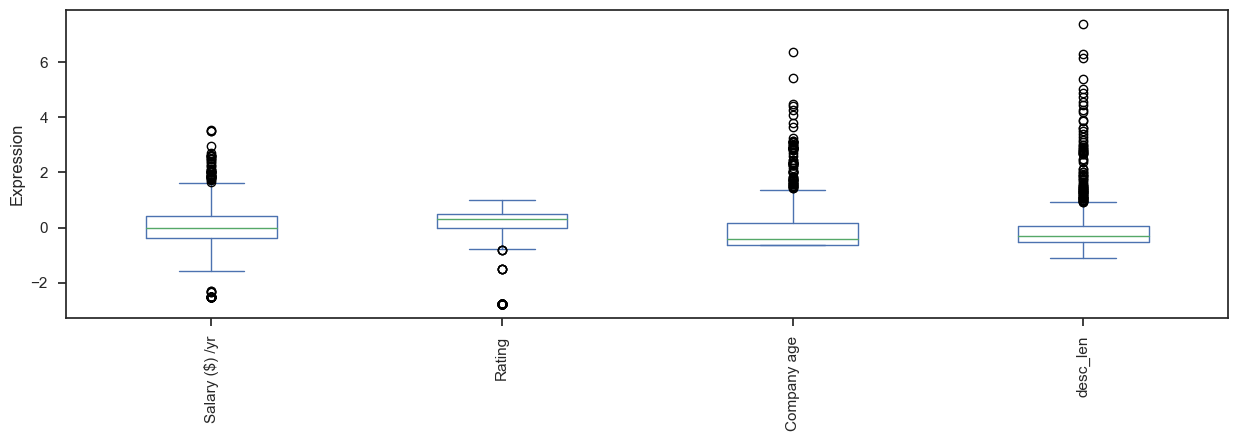

In [387]:
x_scaled.plot(kind='box', figsize=(15, 4), rot=90, ylabel='Expression')

# Faire une analyse en composantes principales (ACP)

In [414]:
from sklearn.decomposition import PCA

pca = PCA() # instanciation de l'objet pca
X_pca = pca.fit_transform(x_scaled) # réalisation de l'ACP sur les données X_scaled
pca_columns = ['PC' + str(c) for c in range(1, X_pca.shape[1]+1, 1)]
X_pca = pd.DataFrame(X_pca, index=X.index, columns=pca_columns) # création du dataframe
X_pca.head()

PC1       PC2       PC3       PC4
0 -0.146192  0.413320 -0.103730  0.408155
1 -0.898867  0.395462 -0.601863  0.701856
2  0.976502  2.369543  0.952908 -1.156675
3 -0.006347  0.546779  0.213191 -0.583982
4 -0.206437  0.726340  0.689235  0.597213

### Calcul de la variance expliquée

PC1    32.226163
PC2    28.115788
PC3    21.906893
PC4    17.751156
dtype: float64


<Axes: ylabel='Explained variance'>

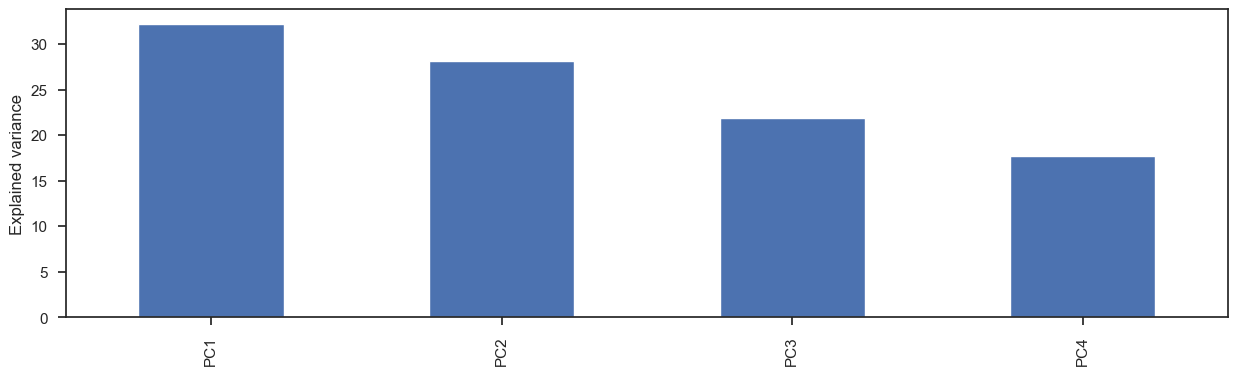

In [417]:
explained_variance = pd.Series(dict(zip(X_pca.columns, 100.0*pca.explained_variance_ratio_)))
print(explained_variance.head())

explained_variance.plot(kind='bar', figsize=(15, 4), rot=90, ylabel='Explained variance')

### Visualisation des deux premières composantes principales de l’ACP

- graphes en (bleu et jaune) est coloré en fonction du colonne "Remote".
- graphes en 3 couleurs est coloré en fonction de la colonne "seniority"

Text(0, 0.5, 'Second Principal Component')

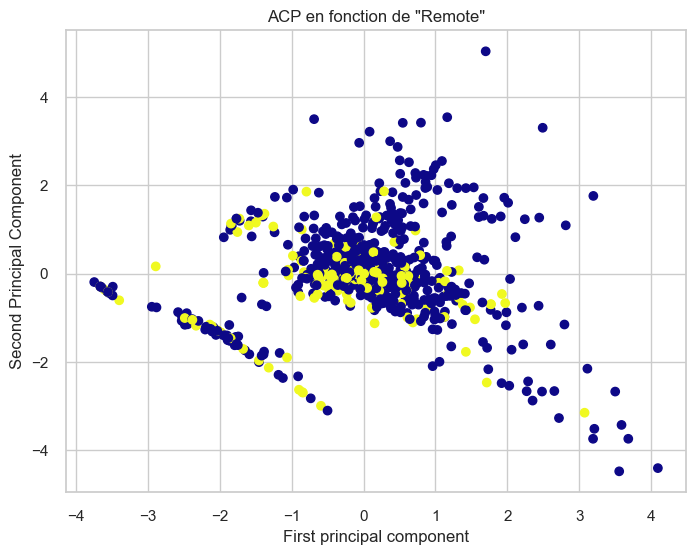

In [696]:
scaler = StandardScaler()
scaler.fit(x_scaled)
scaled_data = scaler.transform(x_scaled)
pca = PCA(n_components=2)
pca.fit(scaled_data)
y_pca = pca.transform(scaled_data)

plt.figure(figsize=(8,6))
plt.scatter(y_pca[:,0],y_pca[:,1],c=d["Remote"],cmap='plasma')
plt.title('ACP en fonction de "Remote"')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Text(0, 0.5, 'Second Principal Component')

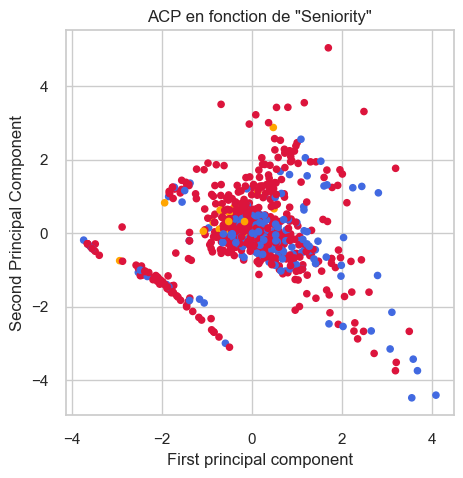

In [697]:
seniority_colors = { 'senior': 'royalblue', 'junior': 'orange', 'nf': 'crimson'} 
y_colors = [seniority_colors[yi] for yi in d["seniority"]]
X_pca.plot(x='PC1', y='PC2', kind='scatter', figsize=(5, 5), color=y_colors)
plt.title('ACP en fonction de "Seniority"')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

-->  Les points se rassemblent naturellement en clusters, notamment deux clusters sont nettement visibles.

### Visualisation des trois premières composantes principales de l’ACP

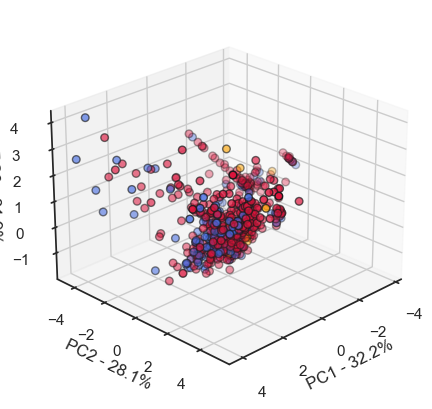

In [426]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_pca['PC1'], X_pca['PC2'], X_pca['PC3'], marker='o', s=30, edgecolor='k', facecolor=y_colors)
ax.set_xlabel('PC1 - ' + '{:.1f}%'.format(explained_variance['PC1']))
ax.set_ylabel('PC2 - ' + '{:.1f}%'.format(explained_variance['PC2']))
ax.set_zlabel('PC3 - ' + '{:.1f}%'.format(explained_variance['PC3']))
ax.view_init(elev=25, azim=45)

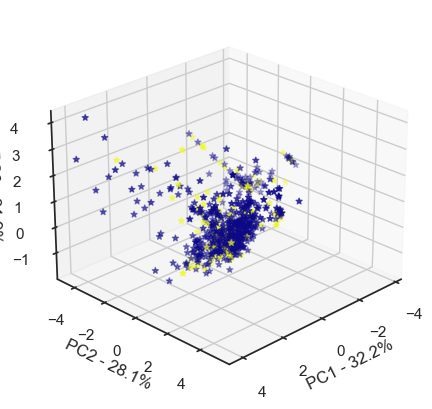

In [429]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_pca['PC1'], X_pca['PC2'], X_pca['PC3'], marker='*',c=d["Remote"],cmap='plasma')
ax.set_xlabel('PC1 - ' + '{:.1f}%'.format(explained_variance['PC1']))
ax.set_ylabel('PC2 - ' + '{:.1f}%'.format(explained_variance['PC2']))
ax.set_zlabel('PC3 - ' + '{:.1f}%'.format(explained_variance['PC3']))
ax.view_init(elev=25, azim=45)

## Visualiser les données avec la méthode (LDA)

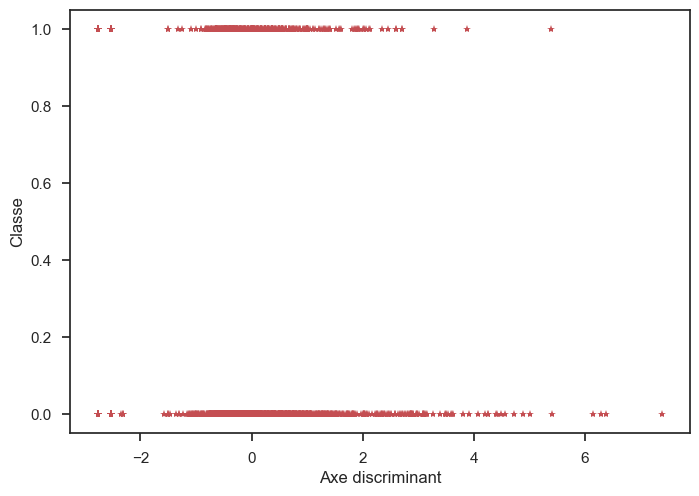

In [493]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
l =lda.fit_transform(x_scaled,d["Remote"])


plt.plot(x_scaled, d["Remote"], 'r*')
plt.xlabel("Axe discriminant")
plt.ylabel("Classe")
plt.show()

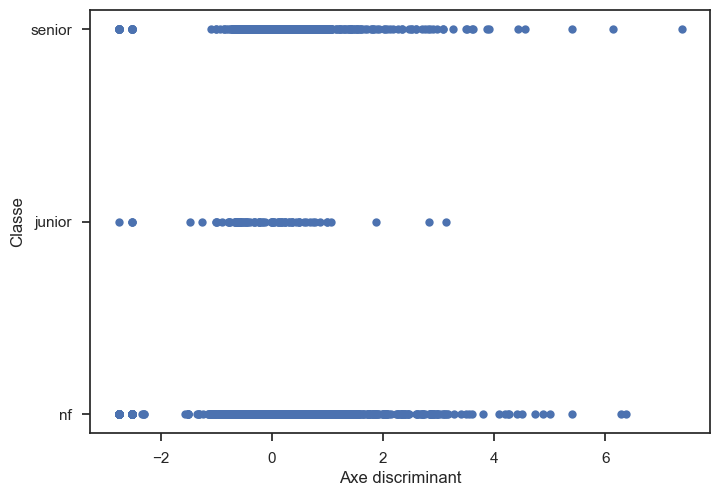

In [491]:
lda = LinearDiscriminantAnalysis()
l =lda.fit_transform(x_scaled,d["seniority"])


plt.plot(x_scaled, d["seniority"], 'bo')
plt.xlabel("Axe discriminant")
plt.ylabel("Classe")
plt.show()

## Visualiser les données avec la méthode LLE

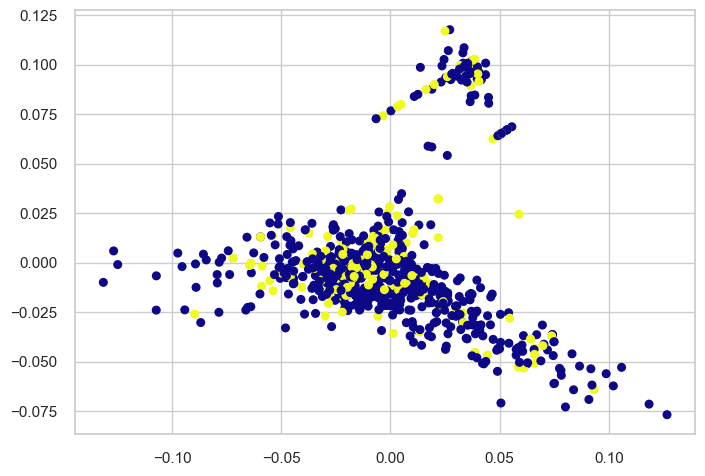

In [718]:
import numpy as np
from sklearn.manifold import LocallyLinearEmbedding
import matplotlib.pyplot as plt

# Instantiate and fit LLE
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=30)
reduced_data = lle.fit_transform(x_scaled)

# Visualize the projected data
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], s=30, c=d["Remote"],cmap='plasma')
plt.show()


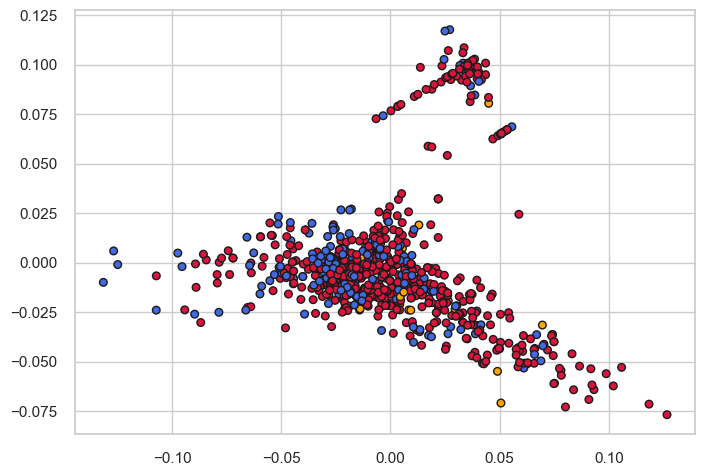

In [719]:
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], s=30, edgecolor='k', facecolor=y_colors)
plt.show()

## Visualiser les données avec la méthode t-SNE


### Projection 2D

In [699]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=45)
X_tsne = tsne.fit_transform(x_scaled)

columns = ['DIM' + str(c) for c in range(1, X_tsne.shape[1]+1, 1)]
X_tsne = pd.DataFrame(X_tsne, index=X.index, columns=columns)
X_tsne.head()

DIM1       DIM2
0 -4.679100   7.844322
1 -9.847504   1.332656
2  2.764876  24.072861
3  1.066220  13.803816
4 -6.071318  11.946360

<Axes: xlabel='DIM1', ylabel='DIM2'>

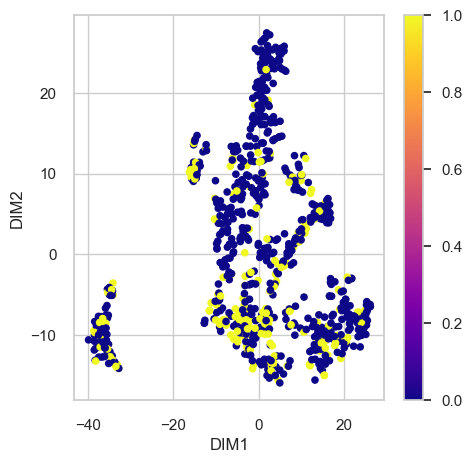

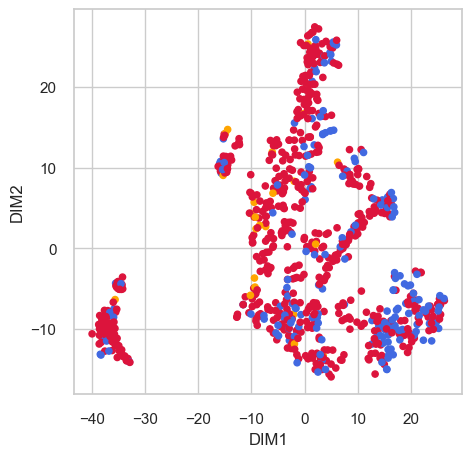

In [700]:
X_tsne.plot(x='DIM1', y='DIM2', kind='scatter', figsize=(5, 5),c=d["Remote"],cmap='plasma')
X_tsne.plot(x='DIM1', y='DIM2', kind='scatter', figsize=(5, 5), color=y_colors)

In [477]:
# La divergence de Kullback-Leibler après optimisation
tsne.kl_divergence_

0.4936710000038147

### Projection 3D 

In [703]:
tsne = TSNE(n_components=3, init='pca', perplexity=45, random_state=0, n_jobs=-1)
X_tsne = tsne.fit_transform(x_scaled)
columns = ['DIM' + str(c) for c in range(1, X_tsne.shape[1]+1, 1)]
X_tsne = pd.DataFrame(X_tsne, index=X.index, columns=columns)
X_tsne.head()

DIM1      DIM2      DIM3
0 -1.294122  2.499997 -0.339978
1 -5.116570  0.199149 -0.177569
2  5.078938  7.477370  3.287634
3  2.344085  4.646261 -0.666582
4 -0.686872  3.615545  1.824725

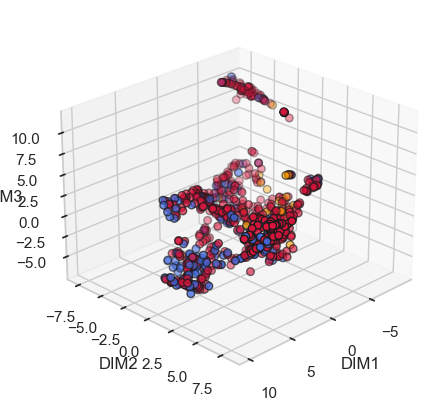

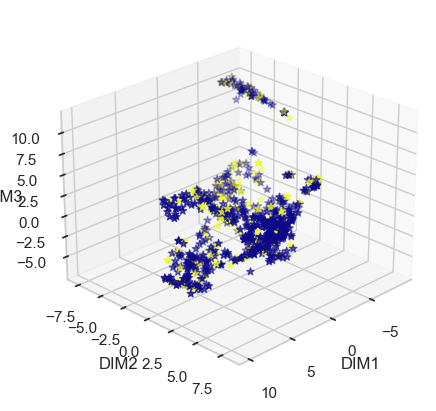

In [704]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_tsne['DIM1'], X_tsne['DIM2'], X_tsne['DIM3'], marker='o', s=30, edgecolor='k', facecolor=y_colors)
ax.set_xlabel('DIM1')
ax.set_ylabel('DIM2')
ax.set_zlabel('DIM3')
ax.view_init(elev=25, azim=45)

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_tsne['DIM1'], X_tsne['DIM2'], X_tsne['DIM3'], marker='*', s=30, c=d["Remote"],cmap='plasma')
ax.set_xlabel('DIM1')
ax.set_ylabel('DIM2')
ax.set_zlabel('DIM3')
ax.view_init(elev=25, azim=45)

In [448]:
tsne.kl_divergence_

0.37536007165908813

## Visualiser les données avec la méthode UMAP

In [452]:
import umap

embedding = umap.UMAP(n_components=2, random_state=0, n_jobs=-1)
X_umap = embedding.fit_transform(x_scaled)
columns = ['DIM' + str(c) for c in range(1, X_umap.shape[1]+1, 1)]
X_umap = pd.DataFrame(X_umap, index=X.index, columns=columns)


C:\Users\HP\anaconda3\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


### Projection 2D

Text(0.5, 1.0, 'UMAP embedding')

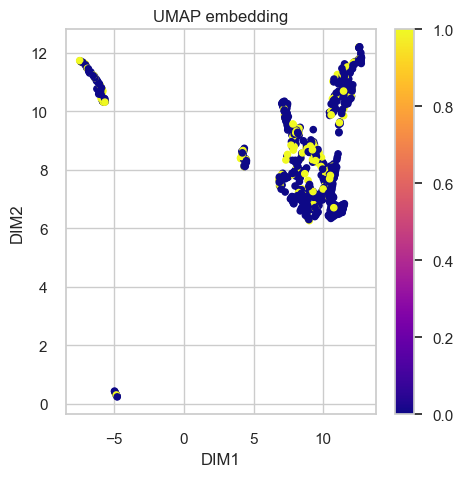

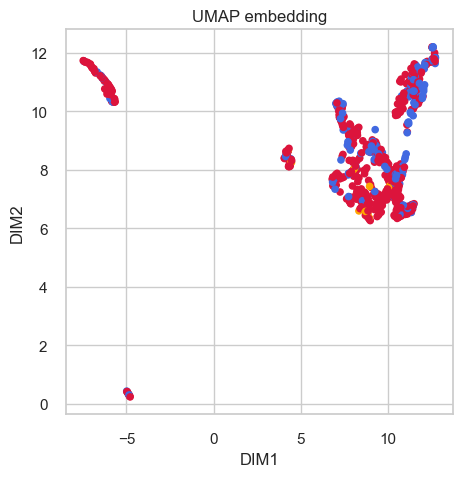

In [723]:
X_umap.plot(x='DIM1', y='DIM2', kind='scatter', figsize=(5, 5), c=d["Remote"],cmap='plasma')
plt.title('UMAP embedding')

X_umap.plot(x='DIM1', y='DIM2', kind='scatter', figsize=(5, 5), color=y_colors)
plt.title('UMAP embedding')

### Projection 3D

In [456]:
embedding = umap.UMAP(n_components=3, random_state=0, n_jobs=-1)
X_umap = embedding.fit_transform(x_scaled)
columns = ['DIM' + str(c) for c in range(1, X_umap.shape[1]+1, 1)]
X_umap = pd.DataFrame(X_umap, index=X.index, columns=columns)

C:\Users\HP\anaconda3\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


C:\Users\HP\AppData\Local\Temp\ipykernel_2696\1622073228.py:3: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X_umap['DIM1'], X_umap['DIM2'], X_umap['DIM3'], marker='+', s=30, edgecolor='k', facecolor=y_colors)


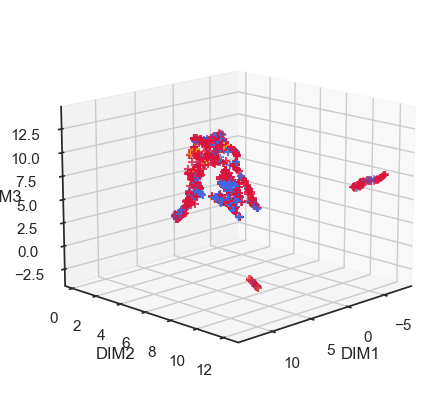

In [463]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_umap['DIM1'], X_umap['DIM2'], X_umap['DIM3'], marker='+', s=30, edgecolor='k', facecolor=y_colors)
ax.set_xlabel('DIM1')
ax.set_ylabel('DIM2')
ax.set_zlabel('DIM3')
ax.view_init(elev=15, azim=45)

C:\Users\HP\AppData\Local\Temp\ipykernel_2696\1708068574.py:3: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X_umap['DIM1'], X_umap['DIM2'], X_umap['DIM3'], marker='+', s=30, edgecolor='k', c=d["Remote"],cmap='plasma')


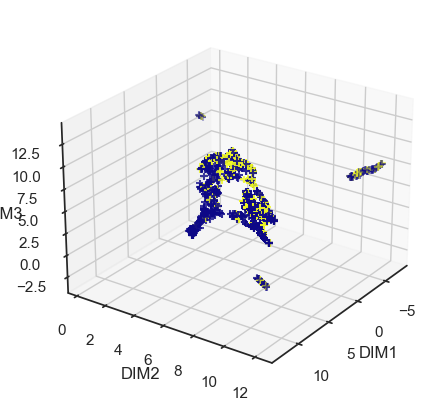

In [462]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_umap['DIM1'], X_umap['DIM2'], X_umap['DIM3'], marker='+', s=30, edgecolor='k', c=d["Remote"],cmap='plasma')
ax.set_xlabel('DIM1')
ax.set_ylabel('DIM2')
ax.set_zlabel('DIM3')
ax.view_init(elev=25, azim=35)

## Visualiser les données avec la méthode Isomap

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


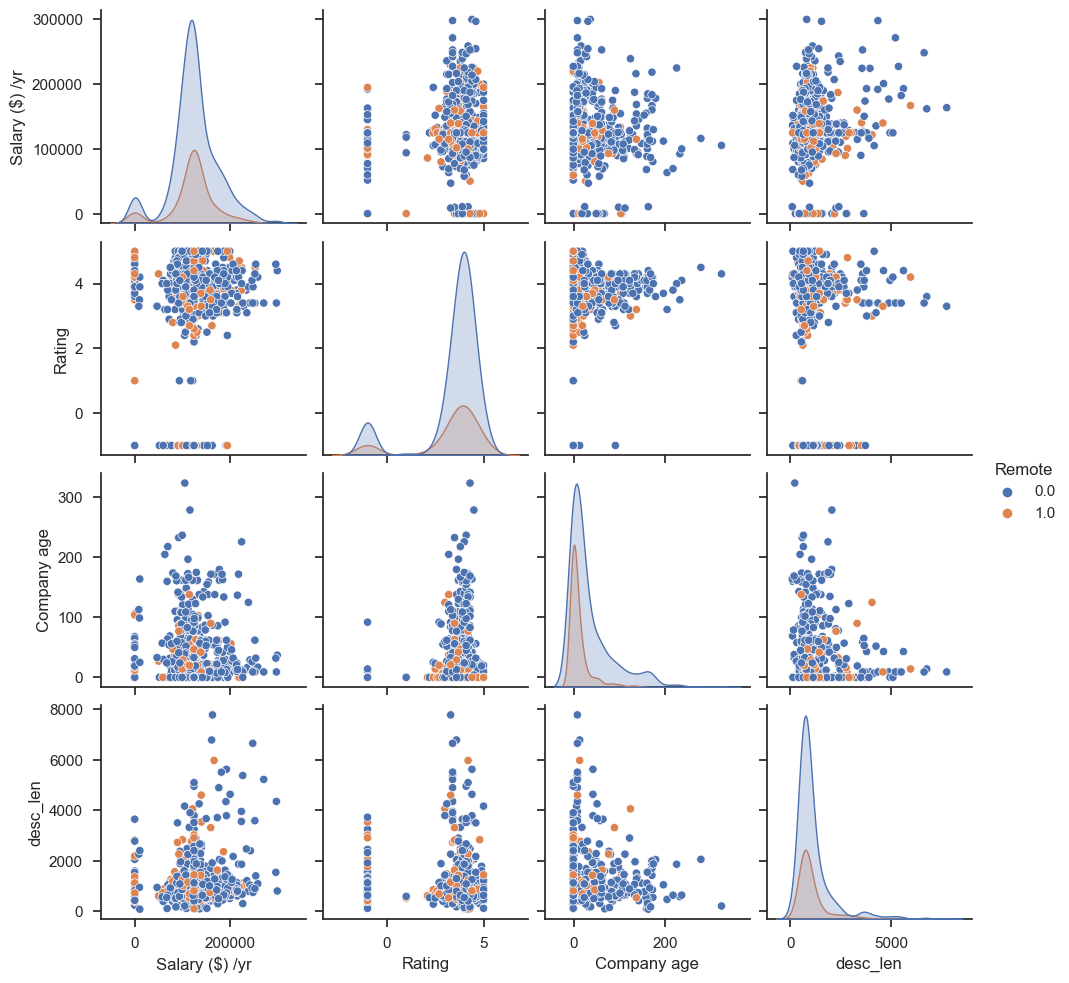

In [609]:
from sklearn.manifold import Isomap
from mpl_toolkits.mplot3d import Axes3D


# Plot the original data
sns.pairplot(pd.concat([X , d["Remote"]], axis=1), hue='Remote')
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\manifold\_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\HP\anaconda3\Lib\site-packages\scipy\sparse\_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


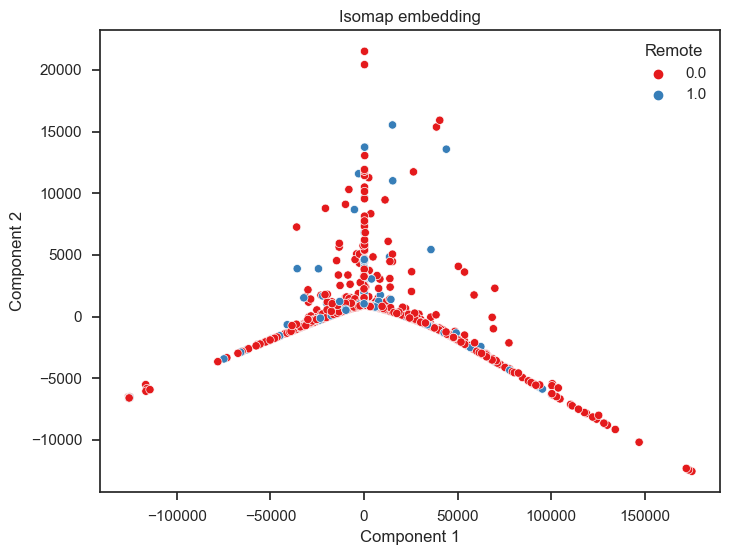

In [613]:
# Apply Isomap
iso = Isomap(n_components=2, n_neighbors=10)
X_iso = iso.fit_transform(X)

# Plot the transformed data
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_iso[:, 0], y=X_iso[:, 1], hue=d['Remote'], palette='Set1')
plt.title('Isomap embedding')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\manifold\_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\HP\anaconda3\Lib\site-packages\scipy\sparse\_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


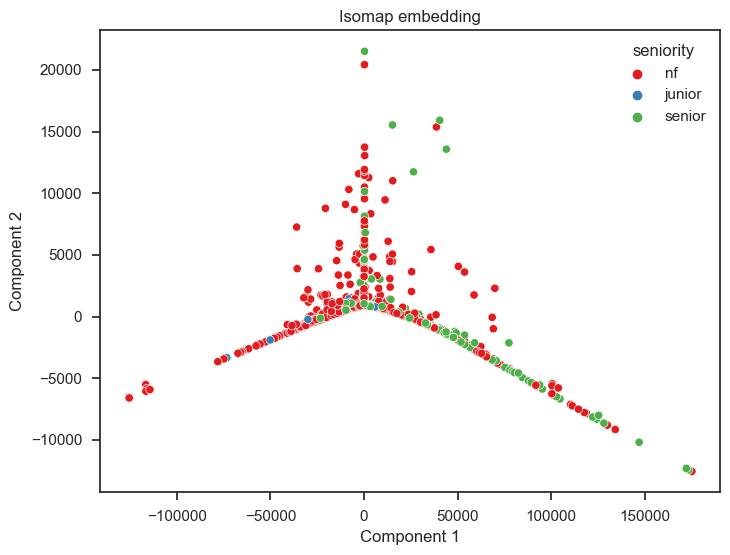

In [617]:
# Apply Isomap
iso = Isomap(n_components=2, n_neighbors=10)
X_iso = iso.fit_transform(X)

# Plot the transformed data
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_iso[:, 0], y=X_iso[:, 1], hue=d['seniority'], palette='Set1')
plt.title('Isomap embedding')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

In [105]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [108]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

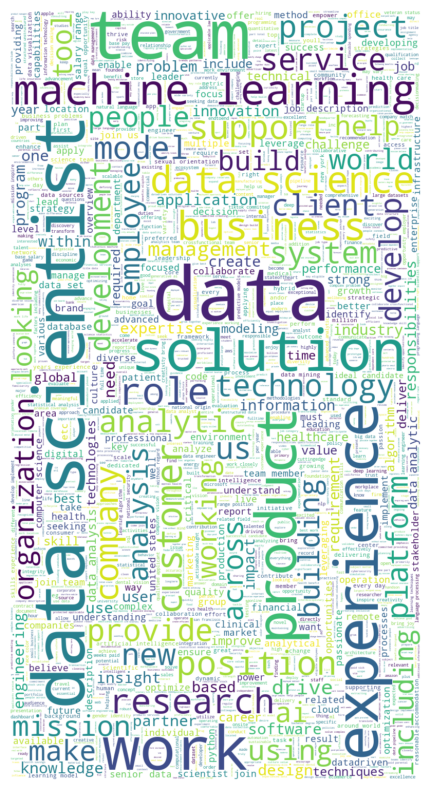

In [720]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

words = " ".join(d['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()